<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone: Can COE premiums be predicted?

## Overview

### Introduction

Certificate of Entitlement (COE) represents a right own a vehicle and use it on Singapore roads for 10 years. COEs are separated into 5 different vehicle categories (A - E). [Source](https://onemotoring.lta.gov.sg/content/onemotoring/home/buying/upfront-vehicle-costs/certificate-of-entitlement--coe-.html#:~:text=A%20Certificate%20of%20Entitlement%20(COE,use%20a%20vehicle%20in%20Singapore.)

- **Cat A**: Car, except fully electric car, with engine capacity up to 1,600cc and Maximum Power Output up to 97kW (130bhp); and fully electric car with Maximum Power Output up to 110kW (147bhp)
- **Cat B**: Car, except fully electric car, with engine capacity above 1,600cc or Maximum Power Output above 97kW (130bhp); and fully electric car with Maximum Power Output above 110kW (147bhp)
- **Cat C**: Goods vehicle and bus
- **Cat D**: Motorcycle
- **Cat E**: Open – all except motorcycle


Quotas allocated by government and is calculated by:
1) Number of vehicles taken off the roads (number of vehicles deregistered).  
2) Allowable growth in vehicle population.  
3) Adjustments to account for changes in taxi population, replacements under Early Turnover Scheme , past over-projections and expired or cancelled temporary COEs, etc.

The current allowable growth in vehicle population from 2022 to 2025 is at 0% for all categories except Cat C which allowed a 0.25% growth.

COE are obtained via bidding exercises which are held on the 1st and 3rd week of each month and each bidding will last for 3 working days. The quota for each category will be announced before the start of each bidding exercise. The COE premium will keep increasing until the number of bidders who are prepared to pay more than or at bidding price equals the quota at the close of the exercise. At the end of each bidding exercise, bidders whose bids are above or equal to the CCP will get a COE. All successful bidders in the same vehicle category will pay the same quota premium for that particular category

When purchasing a car in Singapore, the price of the COE is usually factored together with the overall price of the car. There are also several car packages which car dealers offer. [Source](https://www.sgcarmart.com/news/writeup.php?AID=5)  

For simplicity of this project, I will be talking about 1 type of COE package: 
- Guaranteed COE

Under this scheme, the dealer will get the COE within a fixed period of time, usually three months. The car dealer would have to ensure that they successfully bid for a COE anytime within the three months. The price of this package is fixed and the dealer will be able to earn the difference if they are able to successfully bid for a lower COE than they had priced on the package.



### Problem Statement

As a car dealer in Singapore, I have been tasked to create a model which will be able to accurately predict COE premiums. This will allow the company to maximise profits by accurately bidding when the COE premiums are lower and at the same time set prices that are competitive in the market.

On the other hand, being able to predict the COE premiums accurately would also allow for more successful bids in a shorter time period and this would help to increase the reputation of the company.

**Goal:** To create an accurate model to predict COE premiums, I will be focusing on reducing the Mean Squared Error (MSE) of the predictions made by the model. Additionally, since successful bids are also important, I will create a success metric to ensure that the prediction will be more than or equal to the premium price.

### Dataset

The datasets were extracted from statistics given by LTA:  
https://www.lta.gov.sg/content/ltagov/en/who_we_are/statistics_and_publications/statistics.html (COE PDF)

However, as the LTA statistics were given in a PDF format, they were hard to extract. Another website which has uploaded the statistics had been used instead:  
https://docs.google.com/spreadsheets/d/1Ma8dm_rdtdfNp8ONUG5ykFHwrEg1GFC3ObOMualMVBM/edit#gid=0 (Compiled COE)

I had performed cross checking with the statistics with LTA ensure that the data compiled was correct.

Other datasets were extracted from singstat:  
https://tablebuilder.singstat.gov.sg/

Straits Times Index Pricing chart was extracted from Wall Stree Journal:  
https://www.wsj.com/market-data/quotes/index/SG/STI/historical-prices (STI prices)


### Method

**1) Data Cleaning and Exploratory Data Analysis**  
- Perform data cleaning and extract essential features for further analysis
- Understanding the data in the various datasets

**2) Feature Engineering and selection**
- Separating data for different vehicle categories
- Engineer features(Scarcity, lags for time sensitive data)

**3) Modelling**
- Analyse data and create predictive modelling with ARIMA / SARIMA models, linear regression and neural network models.
- Tune model hyperparameters to improve on the model performance.

**4) Error Analysis**
- Checking on where the model fails and to further improve on the model.

**5) Predictions**
- Utilising the predictive model to predict the prices of upcoming COE premium.

**6) Extending the model**
- Extending the model created for cat A to other predicted COE premiums of other vehicle categories.

## Data Import and Cleaning

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Datasets
gdp = pd.read_csv('../data/GDP.csv')
car_pop = pd.read_csv('../data/Car pop by cat.csv')
car_dereg = pd.read_csv('../data/Car dereg by cat.csv')
population = pd.read_csv('../data/Population.csv')
income = pd.read_csv('../data/household income.csv')
sti = pd.read_csv('../data/HistoricalPrices.csv')
pub_transport = pd.read_csv('../data/Public transport.csv')
air_travel = pd.read_csv('../data/Air Travel.csv')
birth_rate = pd.read_csv('../data/Birth Rate.csv')
coe = pd.read_csv('../data/Results of COE Bidding Exercise - Results.csv')

### Clean gdp dataset

In [3]:
gdp

,Data Series,2021 4Q,2021 3Q,2021 2Q,2021 1Q,2020 4Q,2020 3Q,2020 2Q,2020 1Q,2019 4Q,...,1978 2Q,1978 1Q,1977 4Q,1977 3Q,1977 2Q,1977 1Q,1976 4Q,1976 3Q,1976 2Q,1976 1Q
0,GDP At Current Market Prices,10.4,13.5,23.1,2.5,-4.4,-8.5,-15.0,-0.3,-1.9,...,10.4,10.6,8.8,8.5,9.5,9.3,8.1,9.3,9.5,10.5
1,Goods Producing Industries,14.6,20.4,34.8,4.8,-6.7,-10.4,-18.2,0.3,-15.2,...,7.4,7.7,6.5,6.8,9.5,10,6.2,11.3,14.4,15
2,Manufacturing,16.1,16.6,30.9,10.5,-3.4,-3.2,-11.4,0.1,-18.9,...,12.4,13.6,8.1,10.3,15.2,13.3,10.7,11.8,14.5,13.7
3,Construction,11.8,79.6,125.7,-20.3,-26.6,-53.5,-64.9,-2.2,2.8,...,-7.7,-8.6,-0.1,-1.8,-2.7,2.5,-1.6,12.2,17.6,18.9
4,Utilities,-1.9,3.6,1.0,-15.1,5.1,-7.1,1.9,12.7,1.5,...,16.1,18.9,7.3,3,7.4,7.4,0.7,10.2,7.9,19.7
5,Other Goods Industries,7.6,11.0,34.3,5.3,5.4,-7.1,-15.5,-1.5,4.4,...,-3.9,-9.3,11.8,5.5,0.8,6.8,-5.2,3.2,7.5,10.4
6,Services Producing Industries,9.2,10.5,16.2,0.8,-4.5,-8.1,-12.1,-0.4,2.8,...,12.2,12.1,10.1,8.9,9.2,8.8,9.1,8.4,6.8,8.2
7,Wholesale & Retail Trade,11.7,11.4,15.3,6.8,-0.2,-3.2,-4.3,-4.8,-0.5,...,7,10.4,11.2,8.9,9.4,10.2,8.1,6,0.9,0.7
8,Wholesale Trade,12.2,12.1,13.6,7.4,0.4,-2.6,-0.7,-4.1,0.1,...,na,na,na,na,na,na,na,na,na,na
9,Retail Trade,6.0,2.3,50.5,0.5,-6.6,-10.1,-44.4,-12.0,-6.2,...,na,na,na,na,na,na,na,na,na,na


As the header of the data that are of interests are actually considered within the dataset, there is a need to clean the data and set the headers as the column names instead. Hence, i created a function to rearrange the dataset.

In [4]:
# Creating a function to rearrange the dataset
def clean_df(df):
    # Setting the headers to be the index
    df.set_index(df['Data Series'], inplace=True) 
    df.drop(columns=['Data Series'], inplace=True)
    # Transpose the dataset such that the column names are the correct headers
    df = df.T
    
    # Convert the column names to be lowercase and the spacings to be replaced with '_'
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.replace(' ','_')
    return df

In [5]:
# Using function to clean the dataset
gdp = clean_df(gdp)

In [6]:
# Creating a readable date column
gdp['quarter'] = gdp.index

# Splitting the date into year and quarter respectively
gdp_time_period = ['year', 'quarter']
gdp[gdp_time_period] = gdp['quarter'].str.split(' ', 1, expand=True)

In [7]:
# Converting quarter and year into their respective values
gdp['quarter'] = gdp['quarter'].map(lambda x: 1 if '1Q' in x else 2 if '2Q' in x else 3 if '3Q' in x else 4)
gdp['year'] = gdp['year'].astype(int)

In [8]:
# Convert data of interest to float
gdp['gdp_at_current_market_prices'] = gdp['gdp_at_current_market_prices'].astype(float)

In [9]:
# Renaming column of interest to gdp
gdp.rename(columns={
    'gdp_at_current_market_prices': 'gdp', 
}, inplace=True)

In [10]:
# Checking dataset after cleaning
gdp

Data Series,gdp,goods_producing_industries,manufacturing,construction,utilities,other_goods_industries,services_producing_industries,wholesale_&_retail_trade,wholesale_trade,retail_trade,...,"real_estate,_professional_services_and_administrative_&_support_services",real_estate,professional_services,administrative_&_support_services,other_services_industries,ownership_of_dwellings,gross_value_added_at_basic_prices,add:_taxes_on_products,quarter,year
2021 4Q,10.4,14.6,16.1,11.8,-1.9,7.6,9.2,11.7,12.2,6.0,...,3.3,1.6,4.9,2.5,2.4,1.6,6.6,-2.7,4,2021
2021 3Q,13.5,20.4,16.6,79.6,3.6,11.0,10.5,11.4,12.1,2.3,...,7.3,19.9,5.9,0.2,3.8,0.8,7.7,3.0,3,2021
2021 2Q,23.1,34.8,30.9,125.7,1.0,34.3,16.2,15.3,13.6,50.5,...,11.8,29.2,11.8,-0.1,16.5,0.5,13.8,80.6,2,2021
2021 1Q,2.5,4.8,10.5,-20.3,-15.1,5.3,0.8,6.8,7.4,0.5,...,-7.5,-1.7,-4.3,-15.5,0.2,-2.3,1.7,7.7,1,2021
2020 4Q,-4.4,-6.7,-3.4,-26.6,5.1,5.4,-4.5,-0.2,0.4,-6.6,...,-10.2,-1.8,-7.9,-20.2,-5.1,-0.9,-0.9,-1.4,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977 1Q,9.3,10,13.3,2.5,7.4,6.8,8.8,10.2,na,na,...,-0.1,na,na,na,3.4,6.1,6.2,5.6,1,1977
1976 4Q,8.1,6.2,10.7,-1.6,0.7,-5.2,9.1,8.1,na,na,...,-4,na,na,na,3.4,6.1,7.1,3.4,4,1976
1976 3Q,9.3,11.3,11.8,12.2,10.2,3.2,8.4,6,na,na,...,-3.4,na,na,na,2.4,5.1,7.5,1.8,3,1976
1976 2Q,9.5,14.4,14.5,17.6,7.9,7.5,6.8,0.9,na,na,...,-3.5,na,na,na,4.7,5.1,7.4,7.1,2,1976


### Clean car_pop dataset

In [11]:
car_pop

,Data Series,2022 Mar,2022 Feb,2022 Jan,2021 Dec,2021 Nov,2021 Oct,2021 Sep,2021 Aug,2021 Jul,...,1991 Feb,1991 Jan,1990 Dec,1990 Nov,1990 Oct,1990 Sep,1990 Aug,1990 Jul,1990 Jun,1990 May
0,Total Motor Vehicles,988194,988949,989040,988755,987965,987450,986873,984972,983843,...,545775,543698,542352,540398,539952,537274,535747,534210,533676,532305
1,Category A: Cars,320807,321375,321432,321500,321406,321252,321025,320580,320585,...,221985,221243,221211,220679,221129,220462,220101,219774,219746,219348
2,Category B: Cars,324111,323943,323620,323174,322645,322216,322072,320909,320004,...,52937,52318,51916,51279,51131,50309,49999,49640,49431,49128
3,Weekend Cars/Off Peak Cars,na,na,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
4,Category C: Goods Vehicles & Buses,153782,153787,153844,153841,153710,153616,153492,153361,153263,...,121515,121184,120978,120476,120104,119345,118941,118478,118505,118289
5,Category D: Motorcycles & Scooters,141048,141316,141492,141533,141467,141390,141358,141258,141190,...,122304,121982,121448,121222,120897,120724,120541,120507,120433,120231
6,Taxis,14603,14717,14847,14887,15048,15380,15434,15472,15497,...,12392,12345,12239,12210,12301,12079,11807,11576,11328,11070
7,Vehicles Exempted From VQS,33843,33811,33805,33820,33689,33596,33492,33392,33304,...,14642,14626,14560,14532,14390,14355,14358,14235,14233,14239


In [12]:
# Using function to clean the dataset
car_pop = clean_df(car_pop)

In [13]:
# Dropping unwanted columns
car_pop.drop(columns=['weekend_cars/off_peak_cars'], inplace=True)

In [14]:
# Converting all other columns to be float
for col in car_pop.columns:
    car_pop[col] = car_pop[col].astype(float)

In [15]:
# Creating a readable date column
car_pop['date'] = car_pop.index
car_pop['date'] = car_pop['date'].str.strip()
car_pop['date'] = car_pop['date'].map(lambda x: dt.datetime.strptime(x, '%Y %b'))
car_pop['year'] = car_pop['date'].dt.year
car_pop['month'] = car_pop['date'].dt.month
car_pop

Data Series,total_motor_vehicles,category_a:_cars,category_b:_cars,category_c:_goods_vehicles_&_buses,category_d:_motorcycles_&_scooters,taxis,vehicles_exempted_from_vqs,date,year,month
2022 Mar,988194.0,320807.0,324111.0,153782.0,141048.0,14603.0,33843.0,2022-03-01,2022,3
2022 Feb,988949.0,321375.0,323943.0,153787.0,141316.0,14717.0,33811.0,2022-02-01,2022,2
2022 Jan,989040.0,321432.0,323620.0,153844.0,141492.0,14847.0,33805.0,2022-01-01,2022,1
2021 Dec,988755.0,321500.0,323174.0,153841.0,141533.0,14887.0,33820.0,2021-12-01,2021,12
2021 Nov,987965.0,321406.0,322645.0,153710.0,141467.0,15048.0,33689.0,2021-11-01,2021,11
...,...,...,...,...,...,...,...,...,...,...
1990 Sep,537274.0,220462.0,50309.0,119345.0,120724.0,12079.0,14355.0,1990-09-01,1990,9
1990 Aug,535747.0,220101.0,49999.0,118941.0,120541.0,11807.0,14358.0,1990-08-01,1990,8
1990 Jul,534210.0,219774.0,49640.0,118478.0,120507.0,11576.0,14235.0,1990-07-01,1990,7
1990 Jun,533676.0,219746.0,49431.0,118505.0,120433.0,11328.0,14233.0,1990-06-01,1990,6


In [16]:
# Renaming columns to simpler names
car_pop.rename(columns={
    'total_motor_vehicles': 'total_motor_veh','category_a:_cars': 'cat_a', 
    'category_b:_cars': 'cat_b', 'category_c:_goods_vehicles_&_buses': 'cat_c',
    'category_d:_motorcycles_&_scooters': 'cat_d'}, inplace=True
)
car_pop

Data Series,total_motor_veh,cat_a,cat_b,cat_c,cat_d,taxis,vehicles_exempted_from_vqs,date,year,month
2022 Mar,988194.0,320807.0,324111.0,153782.0,141048.0,14603.0,33843.0,2022-03-01,2022,3
2022 Feb,988949.0,321375.0,323943.0,153787.0,141316.0,14717.0,33811.0,2022-02-01,2022,2
2022 Jan,989040.0,321432.0,323620.0,153844.0,141492.0,14847.0,33805.0,2022-01-01,2022,1
2021 Dec,988755.0,321500.0,323174.0,153841.0,141533.0,14887.0,33820.0,2021-12-01,2021,12
2021 Nov,987965.0,321406.0,322645.0,153710.0,141467.0,15048.0,33689.0,2021-11-01,2021,11
...,...,...,...,...,...,...,...,...,...,...
1990 Sep,537274.0,220462.0,50309.0,119345.0,120724.0,12079.0,14355.0,1990-09-01,1990,9
1990 Aug,535747.0,220101.0,49999.0,118941.0,120541.0,11807.0,14358.0,1990-08-01,1990,8
1990 Jul,534210.0,219774.0,49640.0,118478.0,120507.0,11576.0,14235.0,1990-07-01,1990,7
1990 Jun,533676.0,219746.0,49431.0,118505.0,120433.0,11328.0,14233.0,1990-06-01,1990,6


### Clean car_dereg dataset

In [17]:
# Using function to clean the dataset

car_dereg = clean_df(car_dereg)

In [18]:
# Dropping unwanted columns
car_dereg.drop(columns=['weekend_cars/off_peak_cars'], inplace=True)

In [19]:
# Converting all other columns to be float
for col in car_dereg.columns:
    car_dereg[col] = car_dereg[col].str.replace('-','0')
    car_dereg[col] = car_dereg[col].astype(float)

In [20]:
# Creating a readable date column
car_dereg['date'] = car_dereg.index
car_dereg['date'] = car_dereg['date'].str.strip()
car_dereg['date'] = car_dereg['date'].map(lambda x: dt.datetime.strptime(x, '%Y %b'))
car_dereg['year'] = car_dereg['date'].dt.year
car_dereg['month'] = car_dereg['date'].dt.month

In [21]:
# Renaming columns to simpler names
car_dereg.rename(columns={
    'total_motor_vehicles_de-registered': 'total_motor_veh_dereg','category_a:_cars': 'cat_a_dereg', 
    'category_b:_cars': 'cat_b_dereg', 'category_c:_goods_vehicles_&_buses': 'cat_c_dereg',
    'category_d:_motorcycles_&_scooters': 'cat_d_dereg'}, inplace=True
)

car_dereg

Data Series,total_motor_veh_dereg,cat_a_dereg,cat_b_dereg,cat_c_dereg,cat_d_dereg,taxis,vehicles_exempted_from_vqs,date,year,month
2022 Mar,5618.0,1641.0,1363.0,1005.0,1351.0,191.0,67.0,2022-03-01,2022,3
2022 Feb,3834.0,1042.0,947.0,619.0,1006.0,145.0,75.0,2022-02-01,2022,2
2022 Jan,4412.0,1383.0,1199.0,663.0,991.0,40.0,136.0,2022-01-01,2022,1
2021 Dec,4165.0,1097.0,1167.0,693.0,889.0,276.0,43.0,2021-12-01,2021,12
2021 Nov,4218.0,1198.0,1165.0,604.0,772.0,450.0,29.0,2021-11-01,2021,11
...,...,...,...,...,...,...,...,...,...,...
1990 Sep,2253.0,898.0,207.0,335.0,535.0,152.0,126.0,1990-09-01,1990,9
1990 Aug,2571.0,1034.0,211.0,313.0,784.0,145.0,84.0,1990-08-01,1990,8
1990 Jul,2286.0,944.0,205.0,336.0,560.0,134.0,107.0,1990-07-01,1990,7
1990 Jun,2345.0,1044.0,174.0,347.0,494.0,150.0,136.0,1990-06-01,1990,6


### Clean population dataset

In [22]:
# Using function to clean the dataset
population = clean_df(population)

In [23]:
# Creating a readable date column
population['date'] = population.index
population.columns = population.columns.str.replace(' ', '_')
population.columns = population.columns.str.replace('(', '')
population.columns = population.columns.str.replace(')', '')
population

/var/folders/0t/nymtt02n1zqdc1ksr0n857bc0000gn/T/ipykernel_4231/370924892.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  population.columns = population.columns.str.replace('(', '')
/var/folders/0t/nymtt02n1zqdc1ksr0n857bc0000gn/T/ipykernel_4231/370924892.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  population.columns = population.columns.str.replace(')', '')


Data Series,total_population_number,resident_population_number,singapore_citizen_population_number,permanent_resident_population_number,non-resident_population_number,total_population_growth_per_cent,resident_population_growth_per_cent,population_density_total_population_per_square_kilometre,sex_ratio_males_per_thousand_females,median_age_of_resident_population_years,...,age_dependency_ratio:_citizens_aged_under_15_years_and_65_years_&_over_per_hundred_citizens_aged_15-64_years_number,child_dependency_ratio:_citizens_aged_under_15_years_per_hundred_citizens_aged_15-64_years_number,old-age_dependency_ratio:_citizens_aged_65_years_&_over_per_hundred_citizens_aged_15-64_years_number,old-age_support_ratio:_citizens_aged_20-64_years_per_citizen_aged_65_years_&_over_number,age_dependency_ratio:_citizens_aged_under_20_years_and_65_years_&_over_per_hundred_citizens_aged_20-64_years_number,child_dependency_ratio:_citizens_aged_under_20_years_per_hundred_citizens_aged_20-64_years_number,old-age_dependency_ratio:_citizens_aged_65_years_&_over_per_hundred_citizens_aged_20-64_years_number,natural_increase_number,rate_of_natural_increase_per_thousand_residents,date
2021,5453566.0,3986842.0,3498191.0,488651.0,1466724.0,-4.1,-1.4,7485.0,960.0,41.8,...,48.7,22.5,26.2,3.5,61.4,33.0,28.5,14431.0,2.7,2021
2020,5685807.0,4044210.0,3523191.0,521019.0,1641597.0,-0.3,0.4,7810.0,957.0,41.5,...,46.8,22.2,24.6,3.7,59.7,32.9,26.8,16536.0,3.3,2020
2019,5703569.0,4026209.0,3500940.0,525269.0,1677360.0,1.2,0.8,7866.0,957.0,41.1,...,45.2,22.0,23.2,4.0,58.4,33.1,25.3,17833.0,3.7,2019
2018,5638676.0,3994283.0,3471936.0,522347.0,1644393.0,0.5,0.7,7804.0,959.0,40.8,...,43.7,21.9,21.8,4.2,57.0,33.2,23.8,17757.0,3.7,2018
2017,5612253.0,3965796.0,3439177.0,526619.0,1646457.0,0.1,0.8,7796.0,961.0,40.5,...,42.5,21.9,20.6,4.4,56.2,33.7,22.6,18710.0,4.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,1248200,na,na,na,na,4.7,na,na,1138,na,...,na,na,na,na,na,na,na,46239,37.1,1954
1953,1191800,na,na,na,na,5.7,na,na,1149,na,...,na,na,na,na,na,na,na,42992,36.1,1953
1952,1127000,na,na,na,na,5.5,na,na,1153,na,...,na,na,na,na,na,na,na,39136,34.7,1952
1951,1068100,na,na,na,na,4.5,na,na,1159,na,...,na,na,na,na,na,na,na,35735,33.4,1951


In [24]:
# Converting all other columns to be float
pop_columns = []
for col in population.columns:
    pop_columns.append(col)
pop_columns.remove('date')

In [25]:
for col in pop_columns:
    population[col] = population[col].map(lambda x: np.nan if x == 'na' else x)
    population[col] = population[col].astype(float)

In [26]:
# Creating a readable date column
population['date'] = population['date'].str.strip()
population['date'] = population['date'].map(lambda x: dt.datetime.strptime(x, '%Y'))
population['year'] = population['date'].dt.year

In [27]:
# Renaming columns to simpler names
population.rename(columns={
    'total_population_number': 'total_pop', 
    'population_density_total_population_per_square_kilometre': 'pop_density',
    'total_population_growth_per_cent': 'total_pop_growth'
}, inplace=True)


In [28]:
population

Data Series,total_pop,resident_population_number,singapore_citizen_population_number,permanent_resident_population_number,non-resident_population_number,total_pop_growth,resident_population_growth_per_cent,pop_density,sex_ratio_males_per_thousand_females,median_age_of_resident_population_years,...,child_dependency_ratio:_citizens_aged_under_15_years_per_hundred_citizens_aged_15-64_years_number,old-age_dependency_ratio:_citizens_aged_65_years_&_over_per_hundred_citizens_aged_15-64_years_number,old-age_support_ratio:_citizens_aged_20-64_years_per_citizen_aged_65_years_&_over_number,age_dependency_ratio:_citizens_aged_under_20_years_and_65_years_&_over_per_hundred_citizens_aged_20-64_years_number,child_dependency_ratio:_citizens_aged_under_20_years_per_hundred_citizens_aged_20-64_years_number,old-age_dependency_ratio:_citizens_aged_65_years_&_over_per_hundred_citizens_aged_20-64_years_number,natural_increase_number,rate_of_natural_increase_per_thousand_residents,date,year
2021,5453566.0,3986842.0,3498191.0,488651.0,1466724.0,-4.1,-1.4,7485.0,960.0,41.8,...,22.5,26.2,3.5,61.4,33.0,28.5,14431.0,2.7,2021-01-01,2021
2020,5685807.0,4044210.0,3523191.0,521019.0,1641597.0,-0.3,0.4,7810.0,957.0,41.5,...,22.2,24.6,3.7,59.7,32.9,26.8,16536.0,3.3,2020-01-01,2020
2019,5703569.0,4026209.0,3500940.0,525269.0,1677360.0,1.2,0.8,7866.0,957.0,41.1,...,22.0,23.2,4.0,58.4,33.1,25.3,17833.0,3.7,2019-01-01,2019
2018,5638676.0,3994283.0,3471936.0,522347.0,1644393.0,0.5,0.7,7804.0,959.0,40.8,...,21.9,21.8,4.2,57.0,33.2,23.8,17757.0,3.7,2018-01-01,2018
2017,5612253.0,3965796.0,3439177.0,526619.0,1646457.0,0.1,0.8,7796.0,961.0,40.5,...,21.9,20.6,4.4,56.2,33.7,22.6,18710.0,4.0,2017-01-01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,1248200.0,NaN,NaN,NaN,NaN,4.7,NaN,NaN,1138.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,46239.0,37.1,1954-01-01,1954
1953,1191800.0,NaN,NaN,NaN,NaN,5.7,NaN,NaN,1149.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42992.0,36.1,1953-01-01,1953
1952,1127000.0,NaN,NaN,NaN,NaN,5.5,NaN,NaN,1153.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39136.0,34.7,1952-01-01,1952
1951,1068100.0,NaN,NaN,NaN,NaN,4.5,NaN,NaN,1159.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35735.0,33.4,1951-01-01,1951


### Clean air_travel dataset

In [29]:
air_travel

,Data Series,2022 Mar,2022 Feb,2022 Jan,2021 Dec,2021 Nov,2021 Oct,2021 Sep,2021 Aug,2021 Jul,...,1961 Oct,1961 Sep,1961 Aug,1961 Jul,1961 Jun,1961 May,1961 Apr,1961 Mar,1961 Feb,1961 Jan
0,Number Of Air Passenger Departures,565823,334406,323007,418214,207540,131402,113378,111014,105118,...,13218,13202,12959,12350,10897,11895,13162,12884,11060,11355
1,South East Asia,208515,113276,106257,136491,63304,42710,32967,33892,32232,...,na,na,na,na,na,na,na,na,na,na
2,Indonesia,42417,16715,18250,22810,15668,12646,11557,12031,11355,...,1805,1484,1991,1966,1517,1601,1841,1671,1458,1878
3,Malaysia,45516,27461,37061,44873,10803,6229,4501,4456,4334,...,na,na,na,na,na,na,na,na,na,na
4,Philippines,41339,18073,11405,14551,13004,10519,4331,8026,7754,...,306,177,296,144,165,257,233,195,141,122
5,Thailand,38637,21900,16185,38581,14004,7061,7992,3841,3854,...,1681,1333,1293,1470,1165,1619,1836,1850,1083,919
6,Vietnam,21335,12705,6512,1065,1351,1298,819,991,747,...,na,na,na,na,na,na,na,na,na,na
7,North East Asia,30538,19919,20659,33551,28559,21473,18976,18038,18604,...,na,na,na,na,na,na,na,na,na,na
8,Mainland China,2199,3910,5752,7100,8580,9578,9047,8383,8874,...,na,na,na,na,na,na,na,na,na,na
9,Hong Kong,1843,1253,637,1291,1513,1254,1188,1055,806,...,1436,1447,1235,1112,1018,1261,1489,1459,1008,881


In [30]:
# Using function to clean the dataset
air_travel = clean_df(air_travel)

In [31]:
# Converting all other columns to be float

air_travel_columns = []
for col in air_travel.columns:
    air_travel_columns.append(col)

In [32]:
for col in air_travel_columns:
    air_travel[col] = air_travel[col].map(lambda x: np.nan if x == 'na' or x == '-' else x)
    air_travel[col] = air_travel[col].astype(float)

In [33]:
# Creating a readable date column
air_travel['date'] = air_travel.index
air_travel['date'] = air_travel['date'].str.strip()
air_travel['date'] = air_travel['date'].map(lambda x: dt.datetime.strptime(x, '%Y %b'))
air_travel['year'] = air_travel['date'].dt.year
air_travel['month'] = air_travel['date'].dt.month

In [34]:
# Renaming columns to simpler names
air_travel.rename(columns={'number_of_air_passenger_departures': 'air_departures'}, inplace=True)
air_travel

Data Series,air_departures,south_east_asia,indonesia,malaysia,philippines,thailand,vietnam,north_east_asia,mainland_china,hong_kong,...,oceania,europe,france,germany,united_kingdom,north_america,other_regions,date,year,month
2022 Mar,565823.0,208515.0,42417.0,45516.0,41339.0,38637.0,21335.0,30538.0,2199.0,1843.0,...,105010.0,87934.0,9075.0,16022.0,28869.0,24546.0,3579.0,2022-03-01,2022,3
2022 Feb,334406.0,113276.0,16715.0,27461.0,18073.0,21900.0,12705.0,19919.0,3910.0,1253.0,...,82201.0,50519.0,4887.0,7787.0,17865.0,13595.0,1269.0,2022-02-01,2022,2
2022 Jan,323007.0,106257.0,18250.0,37061.0,11405.0,16185.0,6512.0,20659.0,5752.0,637.0,...,69408.0,57338.0,5332.0,9738.0,20154.0,15462.0,425.0,2022-01-01,2022,1
2021 Dec,418214.0,136491.0,22810.0,44873.0,14551.0,38581.0,1065.0,33551.0,7100.0,1291.0,...,53161.0,83159.0,10213.0,16384.0,24007.0,21877.0,534.0,2021-12-01,2021,12
2021 Nov,207540.0,63304.0,15668.0,10803.0,13004.0,14004.0,1351.0,28559.0,8580.0,1513.0,...,23048.0,41830.0,5170.0,8154.0,12326.0,10861.0,1403.0,2021-11-01,2021,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961 May,11895.0,NaN,1601.0,NaN,257.0,1619.0,NaN,NaN,NaN,1261.0,...,NaN,NaN,NaN,NaN,492.0,NaN,NaN,1961-05-01,1961,5
1961 Apr,13162.0,NaN,1841.0,NaN,233.0,1836.0,NaN,NaN,NaN,1489.0,...,NaN,NaN,NaN,NaN,621.0,NaN,NaN,1961-04-01,1961,4
1961 Mar,12884.0,NaN,1671.0,NaN,195.0,1850.0,NaN,NaN,NaN,1459.0,...,NaN,NaN,NaN,NaN,441.0,NaN,NaN,1961-03-01,1961,3
1961 Feb,11060.0,NaN,1458.0,NaN,141.0,1083.0,NaN,NaN,NaN,1008.0,...,NaN,NaN,NaN,NaN,367.0,NaN,NaN,1961-02-01,1961,2


### Clean income dataset

In [35]:
income

,Year,Resident Households,Unnamed: 2,Resident Employed Households,Unnamed: 4
0,NaN,Average,Median1/,Average,Median1/
1,2000.0,4988,3638,5456,4000
2,2001.0,5338,3860,5736,4141
3,2002.0,5069,3628,5572,4038
4,2003.0,5075,3601,5618,4050
5,2004.0,5194,3689,5761,4106
6,2005.0,5447,3860,6052,4345
7,2006.0,5715,4000,6280,4495
8,2007.0,6295,4375,6889,4883
9,2008.0,7086,4946,7752,5475


In [36]:
# Renaming columns to simpler names
income.rename(columns={'Year': 'year', 'Resident Households': 'average_income', 'Unnamed: 2': 'median_income',
                       'Resident Employed Households': 'average_employed_income',
                        'Unnamed: 4': 'median_employed_income'}, inplace=True)
income.drop(index=0, inplace=True)
income.reset_index(drop=True, inplace=True)

# Convert data of interest to float
for col in income.columns:
    income[col] = income[col].astype(float)
    
income

,year,average_income,median_income,average_employed_income,median_employed_income
0,2000.0,4988.0,3638.0,5456.0,4000.0
1,2001.0,5338.0,3860.0,5736.0,4141.0
2,2002.0,5069.0,3628.0,5572.0,4038.0
3,2003.0,5075.0,3601.0,5618.0,4050.0
4,2004.0,5194.0,3689.0,5761.0,4106.0
5,2005.0,5447.0,3860.0,6052.0,4345.0
6,2006.0,5715.0,4000.0,6280.0,4495.0
7,2007.0,6295.0,4375.0,6889.0,4883.0
8,2008.0,7086.0,4946.0,7752.0,5475.0
9,2009.0,6826.0,4850.0,7549.0,5398.0


### Clean sti dataset

In [37]:
sti

,Date,Open,High,Low,Close
0,04/28/22,3315.75,3344.24,3315.07,3335.09
1,04/27/22,3313.08,3322.85,3308.03,3320.67
2,04/26/22,3343.15,3350.44,3322.05,3322.05
3,04/25/22,3334.53,3356.66,3329.77,3339.59
4,04/22/22,3325.89,3365.21,3312.97,3361.11
...,...,...,...,...,...
5080,02/01/02,1798.29,1798.29,1798.29,1798.29
5081,01/31/02,1802.61,1802.61,1802.61,1802.61
5082,01/30/02,1770.11,1770.11,1770.11,1770.11
5083,01/29/02,1784.22,1784.22,1784.22,1784.22


In [38]:
# Creating a readable date column
sti.columns = sti.columns.str.lower()
sti.columns = sti.columns.str.strip()
sti['date'] = pd.to_datetime(sti['date'])
sti['year'] = sti['date'].dt.year
sti['month'] = sti['date'].dt.month
sti['day'] = sti['date'].dt.day
sti

,date,open,high,low,close,year,month,day
0,2022-04-28,3315.75,3344.24,3315.07,3335.09,2022,4,28
1,2022-04-27,3313.08,3322.85,3308.03,3320.67,2022,4,27
2,2022-04-26,3343.15,3350.44,3322.05,3322.05,2022,4,26
3,2022-04-25,3334.53,3356.66,3329.77,3339.59,2022,4,25
4,2022-04-22,3325.89,3365.21,3312.97,3361.11,2022,4,22
...,...,...,...,...,...,...,...,...
5080,2002-02-01,1798.29,1798.29,1798.29,1798.29,2002,2,1
5081,2002-01-31,1802.61,1802.61,1802.61,1802.61,2002,1,31
5082,2002-01-30,1770.11,1770.11,1770.11,1770.11,2002,1,30
5083,2002-01-29,1784.22,1784.22,1784.22,1784.22,2002,1,29


### Clean birth_rate

In [39]:
birth_rate

,Data Series,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,Total Fertility Rate (Per Female),1.12,1.10,1.14,1.14,1.16,1.20,1.24,1.25,1.19,...,3.22,3.53,3.91,4.46,4.66,4.97,5.16,5.21,5.41,5.76
1,15 - 19 Years (Per Thousand Females),2.1,2.30,2.50,2.50,2.60,2.70,2.70,3.30,3.80,...,27.1,30.9,35.8,33,35.9,38.3,45.7,52,63.4,69.6
2,20 - 24 Years (Per Thousand Females),11.6,12.70,12.70,14.40,15.10,17.00,18.70,19.50,19.70,...,150.1,165.8,195.8,218.5,227.1,240,249,245.5,241.1,250.5
3,25 - 29 Years (Per Thousand Females),53.4,54.60,59.40,60.60,62.20,65.80,68.70,71.10,70.50,...,227.8,236.6,244.7,261.2,259.5,277.6,287.2,291.7,304.9,323.9
4,30 - 34 Years (Per Thousand Females),92.9,90.80,92.40,92.90,93.30,96.20,98.50,99.30,90.20,...,134.3,152,166.7,202,216.2,226.7,228.7,231.5,238.4,259.7
5,35 - 39 Years (Per Thousand Females),53.4,49.00,50.10,48.40,48.60,49.70,49.90,48.30,44.70,...,75.2,85.2,95.9,124.8,138.1,147.7,156.1,156.2,168.9,176.7
6,40 - 44 Years (Per Thousand Females),10.1,9.50,9.90,8.80,9.00,8.80,8.90,8.30,8.00,...,29.4,35.3,42.9,51.7,54.9,62.8,64.9,65.1,64.8,70.7
7,45 - 49 Years (Per Thousand Females),0.3,0.50,0.40,0.50,0.50,0.30,0.40,0.30,0.30,...,na,na,na,na,na,na,na,na,na,na
8,Chinese (Per Female),0.96,0.94,0.99,0.98,1.01,1.07,1.10,1.13,1.05,...,3.05,3.29,3.59,4.08,4.31,4.6,4.83,4.92,5.2,5.62
9,Malays (Per Female),1.82,1.82,1.80,1.85,1.82,1.80,1.79,1.73,1.66,...,3.78,4.52,5.29,6.14,6.31,6.78,6.75,6.63,6.42,6.42


In [40]:
# Using function to clean the dataset
birth_rate = clean_df(birth_rate)

In [41]:
# Further clean dataset
birth_rate.columns = birth_rate.columns.str.replace(' ','_')
birth_rate.columns = birth_rate.columns.str.replace('(', '')
birth_rate.columns = birth_rate.columns.str.replace(')', '')

# Creating a readable date column
birth_rate['date'] = birth_rate.index
birth_rate['date'] = birth_rate['date'].str.strip()
birth_rate['date'] = birth_rate['date'].map(lambda x: dt.datetime.strptime(x, '%Y'))
birth_rate['year'] = birth_rate['date'].dt.year
birth_rate

/var/folders/0t/nymtt02n1zqdc1ksr0n857bc0000gn/T/ipykernel_4231/3989292504.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  birth_rate.columns = birth_rate.columns.str.replace('(', '')
/var/folders/0t/nymtt02n1zqdc1ksr0n857bc0000gn/T/ipykernel_4231/3989292504.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  birth_rate.columns = birth_rate.columns.str.replace(')', '')


Data Series,total_fertility_rate_per_female,15_-_19_years_per_thousand_females,20_-_24_years_per_thousand_females,25_-_29_years_per_thousand_females,30_-_34_years_per_thousand_females,35_-_39_years_per_thousand_females,40_-_44_years_per_thousand_females,45_-_49_years_per_thousand_females,chinese_per_female,malays_per_female,indians_per_female,gross_reproduction_rate_per_female,net_reproduction_rate_per_female,crude_birth_rate_per_thousand_residents,total_live-births_number,resident_live-births_number,date,year
2021,1.12,2.1,11.6,53.4,92.9,53.4,10.1,0.3,0.96,1.82,1.04,na,na,8.6,38651,34154,2021-01-01,2021
2020,1.1,2.3,12.7,54.6,90.8,49.0,9.5,0.5,0.94,1.82,0.96,0.53,0.53,8.5,38590.0,34233.0,2020-01-01,2020
2019,1.14,2.5,12.7,59.4,92.4,50.1,9.9,0.4,0.99,1.8,0.98,0.56,0.56,8.8,39279.0,35330.0,2019-01-01,2019
2018,1.14,2.5,14.4,60.6,92.9,48.4,8.8,0.5,0.98,1.85,1.0,0.56,0.55,8.8,39039.0,35040.0,2018-01-01,2018
2017,1.16,2.6,15.1,62.2,93.3,48.6,9.0,0.5,1.01,1.82,1.0,0.56,0.56,8.9,39615.0,35444.0,2017-01-01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,4.97,38.3,240,277.6,226.7,147.7,62.8,na,4.6,6.78,7.06,2.42,2.22,31.6,58217,na,1964-01-01,1964
1963,5.16,45.7,249,287.2,228.7,156.1,64.9,na,4.83,6.75,6.9,2.51,2.3,33.2,59530,na,1963-01-01,1963
1962,5.21,52,245.5,291.7,231.5,156.2,65.1,na,4.92,6.63,6.96,2.53,2.31,33.7,58977,na,1962-01-01,1962
1961,5.41,63.4,241.1,304.9,238.4,168.9,64.8,na,5.2,6.42,6.96,2.63,2.41,35.2,59930,na,1961-01-01,1961


In [42]:
# Convert data of interest to float
birth_rate['crude_birth_rate_per_thousand_residents'] = birth_rate['crude_birth_rate_per_thousand_residents'].astype(float)
birth_rate

Data Series,total_fertility_rate_per_female,15_-_19_years_per_thousand_females,20_-_24_years_per_thousand_females,25_-_29_years_per_thousand_females,30_-_34_years_per_thousand_females,35_-_39_years_per_thousand_females,40_-_44_years_per_thousand_females,45_-_49_years_per_thousand_females,chinese_per_female,malays_per_female,indians_per_female,gross_reproduction_rate_per_female,net_reproduction_rate_per_female,crude_birth_rate_per_thousand_residents,total_live-births_number,resident_live-births_number,date,year
2021,1.12,2.1,11.6,53.4,92.9,53.4,10.1,0.3,0.96,1.82,1.04,na,na,8.6,38651,34154,2021-01-01,2021
2020,1.1,2.3,12.7,54.6,90.8,49.0,9.5,0.5,0.94,1.82,0.96,0.53,0.53,8.5,38590.0,34233.0,2020-01-01,2020
2019,1.14,2.5,12.7,59.4,92.4,50.1,9.9,0.4,0.99,1.8,0.98,0.56,0.56,8.8,39279.0,35330.0,2019-01-01,2019
2018,1.14,2.5,14.4,60.6,92.9,48.4,8.8,0.5,0.98,1.85,1.0,0.56,0.55,8.8,39039.0,35040.0,2018-01-01,2018
2017,1.16,2.6,15.1,62.2,93.3,48.6,9.0,0.5,1.01,1.82,1.0,0.56,0.56,8.9,39615.0,35444.0,2017-01-01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,4.97,38.3,240,277.6,226.7,147.7,62.8,na,4.6,6.78,7.06,2.42,2.22,31.6,58217,na,1964-01-01,1964
1963,5.16,45.7,249,287.2,228.7,156.1,64.9,na,4.83,6.75,6.9,2.51,2.3,33.2,59530,na,1963-01-01,1963
1962,5.21,52,245.5,291.7,231.5,156.2,65.1,na,4.92,6.63,6.96,2.53,2.31,33.7,58977,na,1962-01-01,1962
1961,5.41,63.4,241.1,304.9,238.4,168.9,64.8,na,5.2,6.42,6.96,2.63,2.41,35.2,59930,na,1961-01-01,1961


In [43]:
# Renaming columns to simpler names
birth_rate.rename(columns={
    'crude_birth_rate_per_thousand_residents': 'birth_rate', 
}, inplace=True)


### Clean COE dataset

In [44]:
coe

,Bidding Exercise,Announcement Date,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids
0,April 2022 Second Open Bidding Exercise,20/04/2022,2022,Cat A (Cars up to 1600cc and 97kW),532,"$68,699",744,519
1,April 2022 Second Open Bidding Exercise,20/04/2022,2022,Cat B (Cars above 1600cc or 97kW),560,"$90,002",687,559
2,April 2022 Second Open Bidding Exercise,20/04/2022,2022,Cat C (Goods vehicles and buses),76,"$52,002",181,76
3,April 2022 Second Open Bidding Exercise,20/04/2022,2022,Cat D (Motorcycles),404,"$9,801",539,355
4,April 2022 Second Open Bidding Exercise,20/04/2022,2022,Cat E (Open),184,"$95,801",295,182
...,...,...,...,...,...,...,...,...
2375,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat A (Cars up to 1600cc and 97kW),"1,338","$26,993","1,546","1,337"
2376,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat B (Cars above 1600cc or 97kW),728,"$23,890",977,728
2377,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat C (Goods vehicles and buses),579,"$10,001",682,544
2378,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat D (Motorcycles),991,$1,734,734


In [45]:
# Convert the column names to be lowercase and the spacings to be replaced with '_'
coe.columns = coe.columns.str.lower()
coe.columns = coe.columns.str.replace(' ','_')

In [46]:
# Removing strings from data
column = ['quota', 'quota_premium', 'total_bids_received', 'number_of_successful_bids']
for col in column:
    coe[col] = coe[col].str.replace(',','')

coe['quota_premium'] = coe['quota_premium'].str.strip('$')

# Convert data of interest to float
for col in column:
    coe[col] = coe[col].astype(float)

In [47]:
# Renaming columns to simpler names
coe.rename(columns={'announcement_date':'date', 'quota_premium':'premium'}, inplace=True)

In [48]:
coe

,bidding_exercise,date,year,category,quota,premium,total_bids_received,number_of_successful_bids
0,April 2022 Second Open Bidding Exercise,20/04/2022,2022,Cat A (Cars up to 1600cc and 97kW),532.0,68699.0,744.0,519.0
1,April 2022 Second Open Bidding Exercise,20/04/2022,2022,Cat B (Cars above 1600cc or 97kW),560.0,90002.0,687.0,559.0
2,April 2022 Second Open Bidding Exercise,20/04/2022,2022,Cat C (Goods vehicles and buses),76.0,52002.0,181.0,76.0
3,April 2022 Second Open Bidding Exercise,20/04/2022,2022,Cat D (Motorcycles),404.0,9801.0,539.0,355.0
4,April 2022 Second Open Bidding Exercise,20/04/2022,2022,Cat E (Open),184.0,95801.0,295.0,182.0
...,...,...,...,...,...,...,...,...
2375,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat A (Cars up to 1600cc and 97kW),1338.0,26993.0,1546.0,1337.0
2376,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat B (Cars above 1600cc or 97kW),728.0,23890.0,977.0,728.0
2377,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat C (Goods vehicles and buses),579.0,10001.0,682.0,544.0
2378,December 2002 Second Open Bidding Exercise,15/12/2002,2002,Cat D (Motorcycles),991.0,1.0,734.0,734.0


In [49]:
# Converting different categories to lowercase
coe['category'] = coe['category'].map(lambda x: 'cat_a' if 'Cat A' in x
                   else 'cat_b' if 'Cat B' in x
                   else 'cat_c' if 'Cat C' in x
                   else 'cat_d' if 'Cat D' in x
                    else 'cat_e'
                   )

In [50]:
# Converting date to datetime format
coe['date'] = pd.to_datetime(coe['date'],format='%d/%m/%Y')

In [51]:
# Adding year, quarter, month, day columns in order for other datasets to reconcile
coe['year'] = coe['date'].dt.year
coe['quarter'] = coe['date'].dt.quarter
coe['month'] = coe['date'].dt.month

# Changing the dates of COE bidding to be standardised Semi-Monthly
coe['day'] = coe['bidding_exercise'].map(lambda x: 1 if 'First' in x else 15)

# Creating a new date columns such that all data are in a semi monthly form
coe['new_date']= pd.to_datetime(coe[['year', 'month', 'day']])

While checking on the coe data, I noticed that there was a suspension of COE bidding exercises for 3 months (6 bidding exercises). This was due to Singapore's Circuit Breaker measures from Apr 2020 to Jun 2020. [Source](https://www.channelnewsasia.com/singapore/coe-bidding-exercises-resume-jul-6-showrooms-reopen-653191)  
The bidding exercises resumed on Jul 2020. As such, I will be imputing data points which will be the same as the last bidding exercise

In [52]:
# Creating new data points
new_row = {
    'bidding_exercise': ['April 2020 First Open Bidding Exercise', 'April 2020 Second Open Bidding Exercise', 'May 2020 First Open Bidding Exercise', 'May 2020 Second Open Bidding Exercise', 'June 2020 First Open Bidding Exercise', 'June 2020 Second Open Bidding Exercise'],
    'date': ['2020-04-01', '2020-04-15', '2020-05-01', '2020-05-15', '2020-06-01', '2020-06-15'],
    'year': [2020, 2020, 2020, 2020, 2020, 2020],
    'category': ['cat_a', 'cat_a', 'cat_a', 'cat_a', 'cat_a', 'cat_a'],
    'quota': [982.0, 982.0, 982.0, 982.0, 982.0, 982.0],
    'premium': [31210.0, 31210.0, 31210.0, 31210.0, 31210.0, 31210.0],
    'total_bids_received': [1421.0, 1421.0, 1421.0, 1421.0, 1421.0, 1421.0],
    'number_of_successful_bids': [962.0, 962.0, 962.0, 962.0, 962.0, 962.0],
    'quarter': [2, 2, 2, 2, 2, 2],
    'month': [4, 4, 5, 5, 6, 6],
    'day': [1, 15, 1, 15, 1, 15],
    'new_date':['2020-04-01', '2020-04-15', '2020-05-01', '2020-05-15', '2020-06-01', '2020-06-15']
}

new_df = pd.DataFrame.from_dict(new_row)
# Concatenating to existing dataframe
coe = pd.concat(objs=[coe, new_df])
coe.reset_index(drop=True, inplace=True)

In [53]:
# Removing unwanted columns
coe = coe.loc[: ,['bidding_exercise', 'date', 'year', 'category', 'premium', 'quota',
       'total_bids_received', 'number_of_successful_bids', 'quarter', 'month',
       'day', 'new_date']]

In [54]:
coe

,bidding_exercise,date,year,category,premium,quota,total_bids_received,number_of_successful_bids,quarter,month,day,new_date
0,April 2022 Second Open Bidding Exercise,2022-04-20 00:00:00,2022,cat_a,68699.0,532.0,744.0,519.0,2,4,15,2022-04-15 00:00:00
1,April 2022 Second Open Bidding Exercise,2022-04-20 00:00:00,2022,cat_b,90002.0,560.0,687.0,559.0,2,4,15,2022-04-15 00:00:00
2,April 2022 Second Open Bidding Exercise,2022-04-20 00:00:00,2022,cat_c,52002.0,76.0,181.0,76.0,2,4,15,2022-04-15 00:00:00
3,April 2022 Second Open Bidding Exercise,2022-04-20 00:00:00,2022,cat_d,9801.0,404.0,539.0,355.0,2,4,15,2022-04-15 00:00:00
4,April 2022 Second Open Bidding Exercise,2022-04-20 00:00:00,2022,cat_e,95801.0,184.0,295.0,182.0,2,4,15,2022-04-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2381,April 2020 Second Open Bidding Exercise,2020-04-15,2020,cat_a,31210.0,982.0,1421.0,962.0,2,4,15,2020-04-15
2382,May 2020 First Open Bidding Exercise,2020-05-01,2020,cat_a,31210.0,982.0,1421.0,962.0,2,5,1,2020-05-01
2383,May 2020 Second Open Bidding Exercise,2020-05-15,2020,cat_a,31210.0,982.0,1421.0,962.0,2,5,15,2020-05-15
2384,June 2020 First Open Bidding Exercise,2020-06-01,2020,cat_a,31210.0,982.0,1421.0,962.0,2,6,1,2020-06-01


In [55]:
# Saving cleaned dataset as CSV
coe.to_csv('../data/coe_cleaned.csv',index=False)

### Adding Lag features

In [56]:
# Adding 1 quarter lag feature to dataset
gdp['quarter_lag'] = gdp['quarter'].map(lambda x: x + 1 if x != 4 else 1)
gdp['year_lag'] = gdp.apply(lambda x: x.year if x.quarter != 4 else (x.year + 1), axis=1)

In [57]:
# Adding 2 quarter lags feature to dataset
gdp['quarter_lag2'] = gdp['quarter_lag'].map(lambda x: x + 1 if x != 4 else 1)
gdp['year_lag2'] = gdp.apply(lambda x: x.year_lag if x.quarter_lag != 4 else (x.year_lag + 1), axis=1)

In [58]:
gdp

Data Series,gdp,goods_producing_industries,manufacturing,construction,utilities,other_goods_industries,services_producing_industries,wholesale_&_retail_trade,wholesale_trade,retail_trade,...,other_services_industries,ownership_of_dwellings,gross_value_added_at_basic_prices,add:_taxes_on_products,quarter,year,quarter_lag,year_lag,quarter_lag2,year_lag2
2021 4Q,10.4,14.6,16.1,11.8,-1.9,7.6,9.2,11.7,12.2,6.0,...,2.4,1.6,6.6,-2.7,4,2021,1,2022,2,2022
2021 3Q,13.5,20.4,16.6,79.6,3.6,11.0,10.5,11.4,12.1,2.3,...,3.8,0.8,7.7,3.0,3,2021,4,2021,1,2022
2021 2Q,23.1,34.8,30.9,125.7,1.0,34.3,16.2,15.3,13.6,50.5,...,16.5,0.5,13.8,80.6,2,2021,3,2021,4,2021
2021 1Q,2.5,4.8,10.5,-20.3,-15.1,5.3,0.8,6.8,7.4,0.5,...,0.2,-2.3,1.7,7.7,1,2021,2,2021,3,2021
2020 4Q,-4.4,-6.7,-3.4,-26.6,5.1,5.4,-4.5,-0.2,0.4,-6.6,...,-5.1,-0.9,-0.9,-1.4,4,2020,1,2021,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977 1Q,9.3,10,13.3,2.5,7.4,6.8,8.8,10.2,na,na,...,3.4,6.1,6.2,5.6,1,1977,2,1977,3,1977
1976 4Q,8.1,6.2,10.7,-1.6,0.7,-5.2,9.1,8.1,na,na,...,3.4,6.1,7.1,3.4,4,1976,1,1977,2,1977
1976 3Q,9.3,11.3,11.8,12.2,10.2,3.2,8.4,6,na,na,...,2.4,5.1,7.5,1.8,3,1976,4,1976,1,1977
1976 2Q,9.5,14.4,14.5,17.6,7.9,7.5,6.8,0.9,na,na,...,4.7,5.1,7.4,7.1,2,1976,3,1976,4,1976


In [59]:
# Adding 1 month lag feature to dataset
car_pop['month_lag'] = car_pop['month'].map(lambda x: x + 1 if x != 12 else 1)
car_pop['year_lag'] = car_pop.apply(lambda x: x.year if x.month != 12 else (x.year + 1), axis=1)

In [60]:
car_pop

Data Series,total_motor_veh,cat_a,cat_b,cat_c,cat_d,taxis,vehicles_exempted_from_vqs,date,year,month,month_lag,year_lag
2022 Mar,988194.0,320807.0,324111.0,153782.0,141048.0,14603.0,33843.0,2022-03-01,2022,3,4,2022
2022 Feb,988949.0,321375.0,323943.0,153787.0,141316.0,14717.0,33811.0,2022-02-01,2022,2,3,2022
2022 Jan,989040.0,321432.0,323620.0,153844.0,141492.0,14847.0,33805.0,2022-01-01,2022,1,2,2022
2021 Dec,988755.0,321500.0,323174.0,153841.0,141533.0,14887.0,33820.0,2021-12-01,2021,12,1,2022
2021 Nov,987965.0,321406.0,322645.0,153710.0,141467.0,15048.0,33689.0,2021-11-01,2021,11,12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
1990 Sep,537274.0,220462.0,50309.0,119345.0,120724.0,12079.0,14355.0,1990-09-01,1990,9,10,1990
1990 Aug,535747.0,220101.0,49999.0,118941.0,120541.0,11807.0,14358.0,1990-08-01,1990,8,9,1990
1990 Jul,534210.0,219774.0,49640.0,118478.0,120507.0,11576.0,14235.0,1990-07-01,1990,7,8,1990
1990 Jun,533676.0,219746.0,49431.0,118505.0,120433.0,11328.0,14233.0,1990-06-01,1990,6,7,1990


In [61]:
# Adding 1 month lag feature to dataset
car_dereg['month_lag'] = car_dereg['month'].map(lambda x: x + 1 if x != 12 else 1)
car_dereg['year_lag'] = car_dereg.apply(lambda x: x.year if x.month != 12 else (x.year + 1), axis=1)

In [62]:
car_dereg

Data Series,total_motor_veh_dereg,cat_a_dereg,cat_b_dereg,cat_c_dereg,cat_d_dereg,taxis,vehicles_exempted_from_vqs,date,year,month,month_lag,year_lag
2022 Mar,5618.0,1641.0,1363.0,1005.0,1351.0,191.0,67.0,2022-03-01,2022,3,4,2022
2022 Feb,3834.0,1042.0,947.0,619.0,1006.0,145.0,75.0,2022-02-01,2022,2,3,2022
2022 Jan,4412.0,1383.0,1199.0,663.0,991.0,40.0,136.0,2022-01-01,2022,1,2,2022
2021 Dec,4165.0,1097.0,1167.0,693.0,889.0,276.0,43.0,2021-12-01,2021,12,1,2022
2021 Nov,4218.0,1198.0,1165.0,604.0,772.0,450.0,29.0,2021-11-01,2021,11,12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
1990 Sep,2253.0,898.0,207.0,335.0,535.0,152.0,126.0,1990-09-01,1990,9,10,1990
1990 Aug,2571.0,1034.0,211.0,313.0,784.0,145.0,84.0,1990-08-01,1990,8,9,1990
1990 Jul,2286.0,944.0,205.0,336.0,560.0,134.0,107.0,1990-07-01,1990,7,8,1990
1990 Jun,2345.0,1044.0,174.0,347.0,494.0,150.0,136.0,1990-06-01,1990,6,7,1990


In [63]:
# Adding 1 year lag feature to dataset
population['year_lag'] = population['year'].map(lambda x: x + 1)

In [64]:
population

Data Series,total_pop,resident_population_number,singapore_citizen_population_number,permanent_resident_population_number,non-resident_population_number,total_pop_growth,resident_population_growth_per_cent,pop_density,sex_ratio_males_per_thousand_females,median_age_of_resident_population_years,...,old-age_dependency_ratio:_citizens_aged_65_years_&_over_per_hundred_citizens_aged_15-64_years_number,old-age_support_ratio:_citizens_aged_20-64_years_per_citizen_aged_65_years_&_over_number,age_dependency_ratio:_citizens_aged_under_20_years_and_65_years_&_over_per_hundred_citizens_aged_20-64_years_number,child_dependency_ratio:_citizens_aged_under_20_years_per_hundred_citizens_aged_20-64_years_number,old-age_dependency_ratio:_citizens_aged_65_years_&_over_per_hundred_citizens_aged_20-64_years_number,natural_increase_number,rate_of_natural_increase_per_thousand_residents,date,year,year_lag
2021,5453566.0,3986842.0,3498191.0,488651.0,1466724.0,-4.1,-1.4,7485.0,960.0,41.8,...,26.2,3.5,61.4,33.0,28.5,14431.0,2.7,2021-01-01,2021,2022
2020,5685807.0,4044210.0,3523191.0,521019.0,1641597.0,-0.3,0.4,7810.0,957.0,41.5,...,24.6,3.7,59.7,32.9,26.8,16536.0,3.3,2020-01-01,2020,2021
2019,5703569.0,4026209.0,3500940.0,525269.0,1677360.0,1.2,0.8,7866.0,957.0,41.1,...,23.2,4.0,58.4,33.1,25.3,17833.0,3.7,2019-01-01,2019,2020
2018,5638676.0,3994283.0,3471936.0,522347.0,1644393.0,0.5,0.7,7804.0,959.0,40.8,...,21.8,4.2,57.0,33.2,23.8,17757.0,3.7,2018-01-01,2018,2019
2017,5612253.0,3965796.0,3439177.0,526619.0,1646457.0,0.1,0.8,7796.0,961.0,40.5,...,20.6,4.4,56.2,33.7,22.6,18710.0,4.0,2017-01-01,2017,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,1248200.0,NaN,NaN,NaN,NaN,4.7,NaN,NaN,1138.0,NaN,...,NaN,NaN,NaN,NaN,NaN,46239.0,37.1,1954-01-01,1954,1955
1953,1191800.0,NaN,NaN,NaN,NaN,5.7,NaN,NaN,1149.0,NaN,...,NaN,NaN,NaN,NaN,NaN,42992.0,36.1,1953-01-01,1953,1954
1952,1127000.0,NaN,NaN,NaN,NaN,5.5,NaN,NaN,1153.0,NaN,...,NaN,NaN,NaN,NaN,NaN,39136.0,34.7,1952-01-01,1952,1953
1951,1068100.0,NaN,NaN,NaN,NaN,4.5,NaN,NaN,1159.0,NaN,...,NaN,NaN,NaN,NaN,NaN,35735.0,33.4,1951-01-01,1951,1952


In [65]:
# Adding 1 year lag feature to dataset
income['year_lag'] = income['year'].map(lambda x: x + 1)

In [66]:
income

,year,average_income,median_income,average_employed_income,median_employed_income,year_lag
0,2000.0,4988.0,3638.0,5456.0,4000.0,2001.0
1,2001.0,5338.0,3860.0,5736.0,4141.0,2002.0
2,2002.0,5069.0,3628.0,5572.0,4038.0,2003.0
3,2003.0,5075.0,3601.0,5618.0,4050.0,2004.0
4,2004.0,5194.0,3689.0,5761.0,4106.0,2005.0
5,2005.0,5447.0,3860.0,6052.0,4345.0,2006.0
6,2006.0,5715.0,4000.0,6280.0,4495.0,2007.0
7,2007.0,6295.0,4375.0,6889.0,4883.0,2008.0
8,2008.0,7086.0,4946.0,7752.0,5475.0,2009.0
9,2009.0,6826.0,4850.0,7549.0,5398.0,2010.0


In [67]:
# Setting time as index 
sti_datetime = sti.set_index('date')
sti_datetime.sort_index(inplace=True)

In [68]:
# Resampling STI into Semi-Monthly-Start format
sti_datetime = sti_datetime.resample('SMS').mean()

In [69]:
# Creating the year, month and day columns
sti_datetime['date'] = sti_datetime.index
sti_datetime['year'] = sti_datetime['date'].dt.year
sti_datetime['month'] = sti_datetime['date'].dt.month
sti_datetime['day'] = sti_datetime['date'].dt.day

In [70]:
# Adding lag feature to the data set.
sti_datetime['day_lag'] = sti_datetime['day'].map(lambda x: 1 if x == 15 else 15)
sti_datetime['month_lag'] = sti_datetime['month'].map(lambda x: x + 1 if x != 12 else 1)
sti_datetime['year_lag'] = sti_datetime.apply(lambda x: x.year if x.month != 12 else (x.year + 1), axis=1)

In [71]:
sti_datetime

,open,high,low,close,year,month,day,date,day_lag,month_lag,year_lag
date,,,,,,,,,,,
2002-01-15,1786.210000,1786.210000,1786.210000,1786.210000,2002,1,15,2002-01-15,1,2,2002
2002-02-01,1760.825000,1760.825000,1760.825000,1760.825000,2002,2,1,2002-02-01,15,3,2002
2002-02-15,1728.021000,1728.021000,1728.021000,1728.021000,2002,2,15,2002-02-15,1,3,2002
2002-03-01,1799.878000,1799.878000,1799.878000,1799.878000,2002,3,1,2002-03-01,15,4,2002
2002-03-15,1813.177000,1813.177000,1813.177000,1813.177000,2002,3,15,2002-03-15,1,4,2002
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-15,3389.153000,3403.981000,3363.848000,3377.386000,2022,2,15,2022-02-15,1,3,2022
2022-03-01,3224.709000,3246.492000,3208.411000,3225.794000,2022,3,1,2022-03-01,15,4,2022
2022-03-15,3364.596154,3381.565385,3351.189231,3367.740769,2022,3,15,2022-03-15,1,4,2022


In [72]:
# Adding lag feature to the data set.
air_travel['month_lag'] = air_travel['month'].map(lambda x: x + 1 if x != 12 else 1)
air_travel['year_lag'] = air_travel.apply(lambda x: x.year if x.month != 12 else (x.year + 1), axis=1)

In [73]:
air_travel

Data Series,air_departures,south_east_asia,indonesia,malaysia,philippines,thailand,vietnam,north_east_asia,mainland_china,hong_kong,...,france,germany,united_kingdom,north_america,other_regions,date,year,month,month_lag,year_lag
2022 Mar,565823.0,208515.0,42417.0,45516.0,41339.0,38637.0,21335.0,30538.0,2199.0,1843.0,...,9075.0,16022.0,28869.0,24546.0,3579.0,2022-03-01,2022,3,4,2022
2022 Feb,334406.0,113276.0,16715.0,27461.0,18073.0,21900.0,12705.0,19919.0,3910.0,1253.0,...,4887.0,7787.0,17865.0,13595.0,1269.0,2022-02-01,2022,2,3,2022
2022 Jan,323007.0,106257.0,18250.0,37061.0,11405.0,16185.0,6512.0,20659.0,5752.0,637.0,...,5332.0,9738.0,20154.0,15462.0,425.0,2022-01-01,2022,1,2,2022
2021 Dec,418214.0,136491.0,22810.0,44873.0,14551.0,38581.0,1065.0,33551.0,7100.0,1291.0,...,10213.0,16384.0,24007.0,21877.0,534.0,2021-12-01,2021,12,1,2022
2021 Nov,207540.0,63304.0,15668.0,10803.0,13004.0,14004.0,1351.0,28559.0,8580.0,1513.0,...,5170.0,8154.0,12326.0,10861.0,1403.0,2021-11-01,2021,11,12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961 May,11895.0,NaN,1601.0,NaN,257.0,1619.0,NaN,NaN,NaN,1261.0,...,NaN,NaN,492.0,NaN,NaN,1961-05-01,1961,5,6,1961
1961 Apr,13162.0,NaN,1841.0,NaN,233.0,1836.0,NaN,NaN,NaN,1489.0,...,NaN,NaN,621.0,NaN,NaN,1961-04-01,1961,4,5,1961
1961 Mar,12884.0,NaN,1671.0,NaN,195.0,1850.0,NaN,NaN,NaN,1459.0,...,NaN,NaN,441.0,NaN,NaN,1961-03-01,1961,3,4,1961
1961 Feb,11060.0,NaN,1458.0,NaN,141.0,1083.0,NaN,NaN,NaN,1008.0,...,NaN,NaN,367.0,NaN,NaN,1961-02-01,1961,2,3,1961


In [74]:
# Adding lag feature to the data set.
birth_rate['year_lag'] = birth_rate['year'].map(lambda x: x + 1)

In [75]:
birth_rate

Data Series,total_fertility_rate_per_female,15_-_19_years_per_thousand_females,20_-_24_years_per_thousand_females,25_-_29_years_per_thousand_females,30_-_34_years_per_thousand_females,35_-_39_years_per_thousand_females,40_-_44_years_per_thousand_females,45_-_49_years_per_thousand_females,chinese_per_female,malays_per_female,indians_per_female,gross_reproduction_rate_per_female,net_reproduction_rate_per_female,birth_rate,total_live-births_number,resident_live-births_number,date,year,year_lag
2021,1.12,2.1,11.6,53.4,92.9,53.4,10.1,0.3,0.96,1.82,1.04,na,na,8.6,38651,34154,2021-01-01,2021,2022
2020,1.1,2.3,12.7,54.6,90.8,49.0,9.5,0.5,0.94,1.82,0.96,0.53,0.53,8.5,38590.0,34233.0,2020-01-01,2020,2021
2019,1.14,2.5,12.7,59.4,92.4,50.1,9.9,0.4,0.99,1.8,0.98,0.56,0.56,8.8,39279.0,35330.0,2019-01-01,2019,2020
2018,1.14,2.5,14.4,60.6,92.9,48.4,8.8,0.5,0.98,1.85,1.0,0.56,0.55,8.8,39039.0,35040.0,2018-01-01,2018,2019
2017,1.16,2.6,15.1,62.2,93.3,48.6,9.0,0.5,1.01,1.82,1.0,0.56,0.56,8.9,39615.0,35444.0,2017-01-01,2017,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,4.97,38.3,240,277.6,226.7,147.7,62.8,na,4.6,6.78,7.06,2.42,2.22,31.6,58217,na,1964-01-01,1964,1965
1963,5.16,45.7,249,287.2,228.7,156.1,64.9,na,4.83,6.75,6.9,2.51,2.3,33.2,59530,na,1963-01-01,1963,1964
1962,5.21,52,245.5,291.7,231.5,156.2,65.1,na,4.92,6.63,6.96,2.53,2.31,33.7,58977,na,1962-01-01,1962,1963
1961,5.41,63.4,241.1,304.9,238.4,168.9,64.8,na,5.2,6.42,6.96,2.63,2.41,35.2,59930,na,1961-01-01,1961,1962


## Exploratory Data Analysis

I would like to take a look at the distributiong of COE premiums across the different categories.

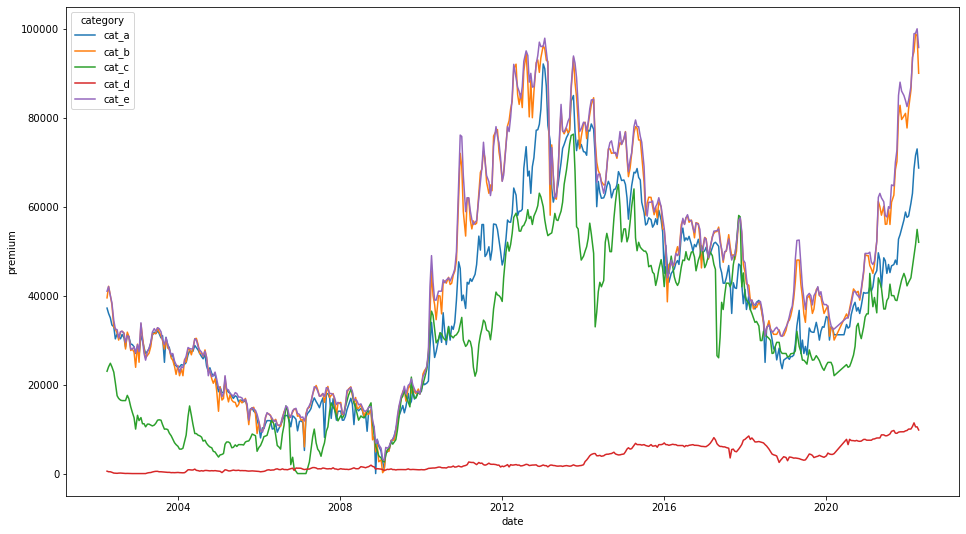

In [76]:
plt.figure(figsize=(16,9),)
sns.lineplot(
    data=coe,
    x='date',
    y='premium',
    hue='category'
);

From this we can see that the distribution of Cat A, B, C and E follows a close pattern but the distbution of Cat D is much lower.  
The price of Cat B and E premiums are the highest and most closely related.

However, each categories' premium price each have their own separate nuances.

Next, I will take a look at the quotas allocated throughout the years.

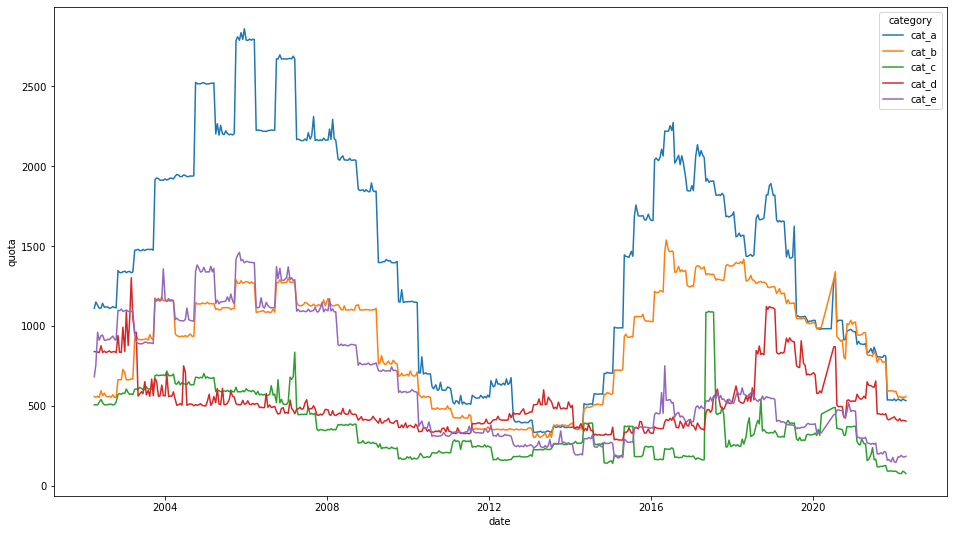

In [77]:
plt.figure(figsize=(16,9),)
sns.lineplot(
    data=coe,
    x='date',
    y='quota',
    hue='category'
);

From here, it can be seen that historically, the government had given the greatest number of allocations to Cat A vehicles.

As each categories' premium price has their own nuances, we would have to build a separate model to predict the premiums. Furthermore, since Cat A has the greatest number of allocations, we will be focusing on Cat A premium prices.

### Extracting Cat A data from COE

In [78]:
coe_cat_a = coe.copy()
car_pop_cat_a = car_pop.copy()
car_dereg_cat_a = car_dereg.copy()

In [79]:
car_pop_cat_a.columns

Index(['total_motor_veh', 'cat_a', 'cat_b', 'cat_c', 'cat_d', 'taxis',
       'vehicles_exempted_from_vqs', 'date', 'year', 'month', 'month_lag',
       'year_lag'],
      dtype='object', name='Data Series')

In [80]:
# Creating a cat a only dataset
coe_cat_a = coe_cat_a.loc[coe_cat_a['category'] == 'cat_a']

# Dropping columns of other categories.
car_pop_cat_a.drop(columns=['cat_b', 'cat_c', 'cat_d', 'taxis', 'vehicles_exempted_from_vqs','date'], inplace=True)
car_dereg_cat_a.drop(columns=['cat_b_dereg', 'cat_c_dereg', 'cat_d_dereg', 'taxis', 'vehicles_exempted_from_vqs'], inplace=True)


### Merging all datasets to coe_cat_a

In [81]:
# Merging Cat A dataset with car population and car deregistration dataset
merged_df_cat_a = coe_cat_a.merge(car_pop_cat_a, how='left', left_on=['year', 'month'], right_on=['year', 'month'], suffixes=('', '_drop'))
merged_df_cat_a = merged_df_cat_a.merge(car_dereg_cat_a, how='left', left_on=['year', 'month'], right_on=['year', 'month'], suffixes=('', '_drop'))


In [82]:
# Creating a merged Cat A dataset with car population and car deregistration dataset using lag features
merged_df_cat_a_lag = coe_cat_a.merge(car_pop_cat_a.drop(columns=['year', 'month']), how='left', left_on=['year', 'month'], right_on=['year_lag', 'month_lag'])
merged_df_cat_a_lag = merged_df_cat_a_lag.merge(car_dereg_cat_a.drop(columns=['year', 'month']), how='left', left_on=['year', 'month'], right_on=['year_lag', 'month_lag'])


In [83]:
merged_df_cat_a_lag

,bidding_exercise,date_x,year,category,premium,quota,total_bids_received,number_of_successful_bids,quarter,month,...,new_date,total_motor_veh,cat_a,month_lag_x,year_lag_x,total_motor_veh_dereg,cat_a_dereg,date_y,month_lag_y,year_lag_y
0,April 2022 Second Open Bidding Exercise,2022-04-20 00:00:00,2022,cat_a,68699.0,532.0,744.0,519.0,2,4,...,2022-04-15 00:00:00,988194.0,320807.0,4,2022,5618.0,1641.0,2022-03-01,4,2022
1,April 2022 First Open Bidding Exercise,2022-04-06 00:00:00,2022,cat_a,72996.0,536.0,723.0,536.0,2,4,...,2022-04-01 00:00:00,988194.0,320807.0,4,2022,5618.0,1641.0,2022-03-01,4,2022
2,March 2022 Second Open Bidding Exercise,2022-03-23 00:00:00,2022,cat_a,71556.0,543.0,849.0,542.0,1,3,...,2022-03-15 00:00:00,988949.0,321375.0,3,2022,3834.0,1042.0,2022-02-01,3,2022
3,March 2022 First Open Bidding Exercise,2022-03-09 00:00:00,2022,cat_a,68501.0,531.0,962.0,526.0,1,3,...,2022-03-01 00:00:00,988949.0,321375.0,3,2022,3834.0,1042.0,2022-02-01,3,2022
4,February 2022 Second Open Bidding Exercise,2022-02-23 00:00:00,2022,cat_a,63000.0,536.0,876.0,524.0,1,2,...,2022-02-15 00:00:00,989040.0,321432.0,2,2022,4412.0,1383.0,2022-01-01,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,April 2020 Second Open Bidding Exercise,2020-04-15,2020,cat_a,31210.0,982.0,1421.0,962.0,2,4,...,2020-04-15,973761.0,321127.0,4,2020,7976.0,2397.0,2020-03-01,4,2020
478,May 2020 First Open Bidding Exercise,2020-05-01,2020,cat_a,31210.0,982.0,1421.0,962.0,2,5,...,2020-05-01,970431.0,319683.0,5,2020,4976.0,1707.0,2020-04-01,5,2020
479,May 2020 Second Open Bidding Exercise,2020-05-15,2020,cat_a,31210.0,982.0,1421.0,962.0,2,5,...,2020-05-15,970431.0,319683.0,5,2020,4976.0,1707.0,2020-04-01,5,2020
480,June 2020 First Open Bidding Exercise,2020-06-01,2020,cat_a,31210.0,982.0,1421.0,962.0,2,6,...,2020-06-01,967322.0,318512.0,6,2020,3762.0,1184.0,2020-05-01,6,2020


In [84]:
# Creating simple df from other datasets with only columns of interest
gdp_simple = gdp[['gdp', 'year', 'quarter', 'year_lag', 'quarter_lag', 'year_lag2', 'quarter_lag2']]
pop_extract = population[['year', 'year_lag', 'total_pop', 'pop_density', 'total_pop_growth']]
simple_air_travel = air_travel[['air_departures', 'year', 'month', 'year_lag', 'month_lag']]
simple_birth_rate = birth_rate[['year', 'year_lag', 'birth_rate']]


In [85]:
# Merging all the different datasets based on the time elements
merged_df_cat_a = merged_df_cat_a.merge(
    gdp_simple,
    how='left',
    left_on=['year', 'quarter'],
    right_on=['year', 'quarter'],
    suffixes=('', '_drop'))

merged_df_cat_a = merged_df_cat_a.merge(
    pop_extract,
    how='left',
    left_on=['year'],
    right_on=['year'],
    suffixes=('', '_drop'))

merged_df_cat_a = merged_df_cat_a.merge(
    income,
    how='left',
    left_on=['year'],
    right_on=['year'],
    suffixes=('', '_drop'))

merged_df_cat_a = merged_df_cat_a.merge(
    sti.drop(columns=['date', 'open', 'high', 'low']),
    how='left',
    left_on=['year', 'month', 'day'],
    right_on=['year', 'month', 'day'],
    suffixes=('', '_drop'))

merged_df_cat_a = merged_df_cat_a.merge(
    simple_air_travel,
    how='left',
    left_on=['year', 'month'],
    right_on=['year', 'month'],
    suffixes=('', '_drop'))

merged_df_cat_a = merged_df_cat_a.merge(
    simple_birth_rate,
    how='left',
    left_on=['year'],
    right_on=['year'],
    suffixes=('', '_drop'))

merged_df_cat_a.drop([col for col in merged_df_cat_a.columns if 'drop' in col], axis=1, inplace=True)

In [86]:
merged_df_cat_a

,bidding_exercise,date,year,category,premium,quota,total_bids_received,number_of_successful_bids,quarter,month,...,total_pop,pop_density,total_pop_growth,average_income,median_income,average_employed_income,median_employed_income,close,air_departures,birth_rate
0,April 2022 Second Open Bidding Exercise,2022-04-20 00:00:00,2022,cat_a,68699.0,532.0,744.0,519.0,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,April 2022 First Open Bidding Exercise,2022-04-06 00:00:00,2022,cat_a,72996.0,536.0,723.0,536.0,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3419.11,NaN,NaN
2,March 2022 Second Open Bidding Exercise,2022-03-23 00:00:00,2022,cat_a,71556.0,543.0,849.0,542.0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3236.04,565823.0,NaN
3,March 2022 First Open Bidding Exercise,2022-03-09 00:00:00,2022,cat_a,68501.0,531.0,962.0,526.0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3278.63,565823.0,NaN
4,February 2022 Second Open Bidding Exercise,2022-02-23 00:00:00,2022,cat_a,63000.0,536.0,876.0,524.0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3421.38,334406.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,April 2020 Second Open Bidding Exercise,2020-04-15,2020,cat_a,31210.0,982.0,1421.0,962.0,2,4,...,5685807.0,7810.0,-0.3,9634.0,6810.0,11111.0,8092.0,2605.56,17340.0,8.5
478,May 2020 First Open Bidding Exercise,2020-05-01,2020,cat_a,31210.0,982.0,1421.0,962.0,2,5,...,5685807.0,7810.0,-0.3,9634.0,6810.0,11111.0,8092.0,NaN,20400.0,8.5
479,May 2020 Second Open Bidding Exercise,2020-05-15,2020,cat_a,31210.0,982.0,1421.0,962.0,2,5,...,5685807.0,7810.0,-0.3,9634.0,6810.0,11111.0,8092.0,2523.55,20400.0,8.5
480,June 2020 First Open Bidding Exercise,2020-06-01,2020,cat_a,31210.0,982.0,1421.0,962.0,2,6,...,5685807.0,7810.0,-0.3,9634.0,6810.0,11111.0,8092.0,2550.86,34190.0,8.5


In [87]:
# Saving the merged dataset to csv
merged_df_cat_a.to_csv('../data/merged_cat_a.csv', index = False)

In [88]:
# Merging all the different datasets using lag features
merged_df_cat_a_lag = merged_df_cat_a_lag.merge(
    gdp_simple.drop(columns=['year', 'quarter']),
    how='left',
    left_on=['year', 'quarter'],
    right_on=['year_lag2', 'quarter_lag2'],
    suffixes=('', '_drop'))

merged_df_cat_a_lag = merged_df_cat_a_lag.merge(
    pop_extract.drop(columns=['year']),
    how='left',
    left_on=['year'],
    right_on=['year_lag'], 
    suffixes=('', '_drop'))

merged_df_cat_a_lag = merged_df_cat_a_lag.merge(
    income.drop(columns=['year']),
    how='left',
    left_on=['year'],
    right_on=['year_lag'],
    suffixes=('', '_drop'))

merged_df_cat_a_lag = merged_df_cat_a_lag.merge(
    sti_datetime.drop(columns=['date', 'open', 'high', 'low', 'year', 'month', 'day']),
    how='left',
    left_on=['year', 'month', 'day'],
    right_on=['year_lag', 'month_lag', 'day_lag'],
    suffixes=('', '_drop'))

merged_df_cat_a_lag = merged_df_cat_a_lag.merge(
    simple_air_travel.drop(columns=['year', 'month']),
    how='left',
    left_on=['year', 'month'],
    right_on=['year_lag', 'month_lag'],
    suffixes=('', '_drop'))

merged_df_cat_a_lag = merged_df_cat_a_lag.merge(
    simple_birth_rate.drop(columns=['year']),
    how='left',
    left_on=['year'],
    right_on=['year_lag'],
    suffixes=('', '_drop'))

merged_df_cat_a_lag.drop([col for col in merged_df_cat_a_lag.columns if 'drop' in col], axis=1, inplace=True)

In [89]:
merged_df_cat_a_lag

,bidding_exercise,date_x,year,category,premium,quota,total_bids_received,number_of_successful_bids,quarter,month,...,total_pop_growth,average_income,median_income,average_employed_income,median_employed_income,close,day_lag,month_lag,air_departures,birth_rate
0,April 2022 Second Open Bidding Exercise,2022-04-20 00:00:00,2022,cat_a,68699.0,532.0,744.0,519.0,2,4,...,-4.1,9827.0,7261.0,11137.0,8421.0,3225.794000,15,4,565823.0,8.6
1,April 2022 First Open Bidding Exercise,2022-04-06 00:00:00,2022,cat_a,72996.0,536.0,723.0,536.0,2,4,...,-4.1,9827.0,7261.0,11137.0,8421.0,3367.740769,1,4,565823.0,8.6
2,March 2022 Second Open Bidding Exercise,2022-03-23 00:00:00,2022,cat_a,71556.0,543.0,849.0,542.0,1,3,...,-4.1,9827.0,7261.0,11137.0,8421.0,3389.226250,15,3,334406.0,8.6
3,March 2022 First Open Bidding Exercise,2022-03-09 00:00:00,2022,cat_a,68501.0,531.0,962.0,526.0,1,3,...,-4.1,9827.0,7261.0,11137.0,8421.0,3377.386000,1,3,334406.0,8.6
4,February 2022 Second Open Bidding Exercise,2022-02-23 00:00:00,2022,cat_a,63000.0,536.0,876.0,524.0,1,2,...,-4.1,9827.0,7261.0,11137.0,8421.0,3213.605000,15,2,323007.0,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,April 2020 Second Open Bidding Exercise,2020-04-15,2020,cat_a,31210.0,982.0,1421.0,962.0,2,4,...,1.2,9763.0,7000.0,11250.0,8333.0,2874.283000,15,4,791383.0,8.8
478,May 2020 First Open Bidding Exercise,2020-05-01,2020,cat_a,31210.0,982.0,1421.0,962.0,2,5,...,1.2,9763.0,7000.0,11250.0,8333.0,2575.338333,1,5,17340.0,8.8
479,May 2020 Second Open Bidding Exercise,2020-05-15,2020,cat_a,31210.0,982.0,1421.0,962.0,2,5,...,1.2,9763.0,7000.0,11250.0,8333.0,2515.294444,15,5,17340.0,8.8
480,June 2020 First Open Bidding Exercise,2020-06-01,2020,cat_a,31210.0,982.0,1421.0,962.0,2,6,...,1.2,9763.0,7000.0,11250.0,8333.0,2533.704000,1,6,20400.0,8.8


In [90]:
# Saving the merged with lag dataset to csv.
merged_df_cat_a_lag.to_csv('../data/merged_cat_a_lag.csv', index = False)

### EDA for CAT A data

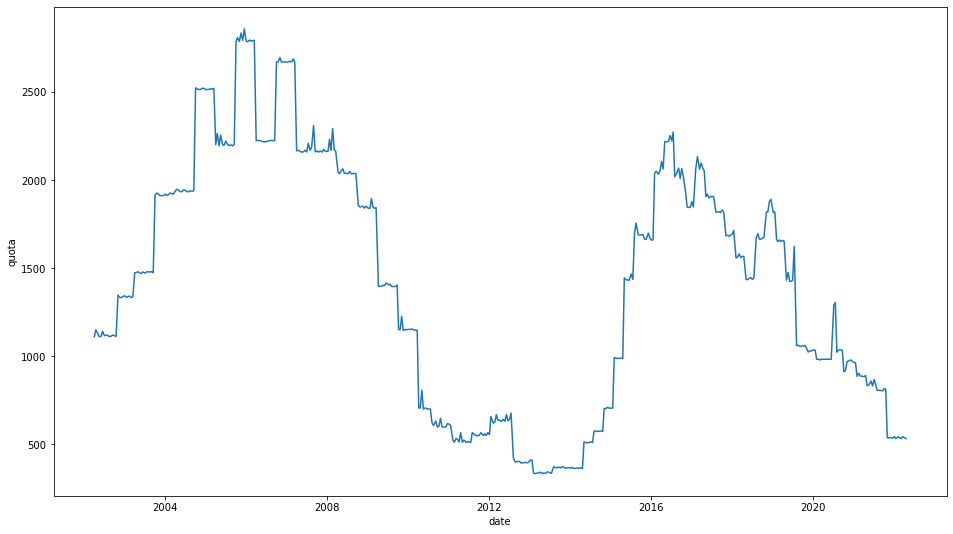

In [91]:
plt.figure(figsize=(16,9),)
sns.lineplot(
    data=merged_df_cat_a,
    x='date',
    y='quota',
   # hue='category'
);

In [92]:
# Removing the scientific notation
pd. set_option('display.float_format', lambda x: '%.2f' % x)

In [93]:
# Checking on summery statistic of the data
merged_df_cat_a.drop(columns=[
    'year', 'quarter', 'month', 'new_date',
    'month_lag', 'year_lag',
    'quarter_lag', 'year_lag2', 'quarter_lag2'
]).describe().T

,count,mean,std,min,25%,50%,75%,max
premium,482.00,37371.34,20066.43,2.00,20021.00,33009.00,52225.75,92100.00
quota,482.00,1404.21,702.55,333.00,704.25,1431.50,1946.25,2858.00
total_bids_received,482.00,1960.32,976.81,418.00,1097.25,1974.00,2596.25,5927.00
number_of_successful_bids,482.00,1393.49,701.31,324.00,697.25,1419.00,1946.25,2858.00
day,482.00,8.00,7.01,1.00,1.00,8.00,15.00,15.00
total_motor_veh,480.00,894324.71,98491.14,704668.00,814098.75,953103.50,967385.25,989040.00
cat_a,480.00,310826.14,27378.45,256968.00,291550.25,318972.00,334056.00,342088.00
total_motor_veh_dereg,480.00,6786.99,2673.59,1964.00,4212.75,6960.50,9243.75,16091.00
cat_a_dereg,480.00,2846.63,1534.20,363.00,1383.00,3122.50,4081.75,6559.00
gdp,474.00,6.48,6.48,-15.00,2.90,6.30,10.50,23.10


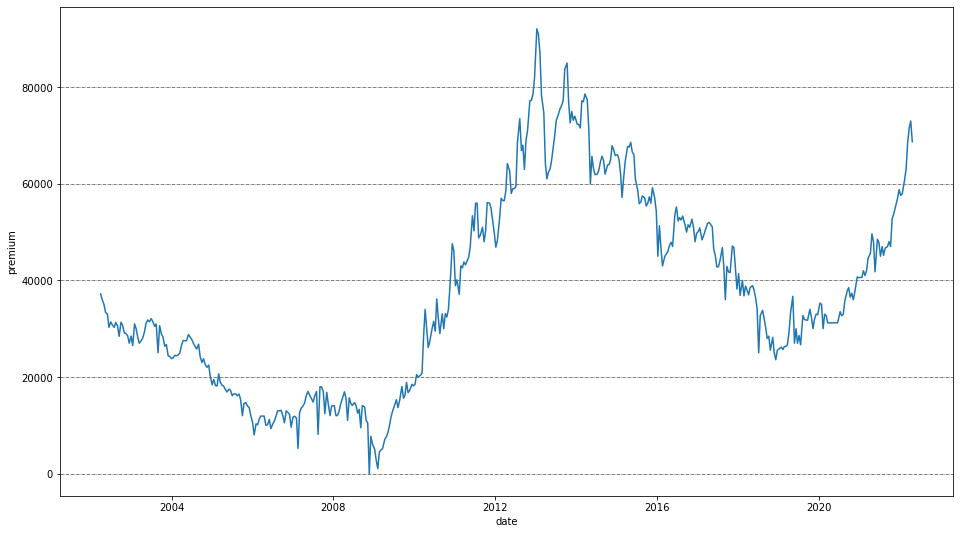

In [94]:
# Plotting the cat a premium price
plt.figure(figsize=(16,9),)
sns.lineplot(
    data=merged_df_cat_a,
    x='date',
    y='premium',
)

plt.grid(color = 'black', axis='y', linestyle = '-.', linewidth = 0.5);

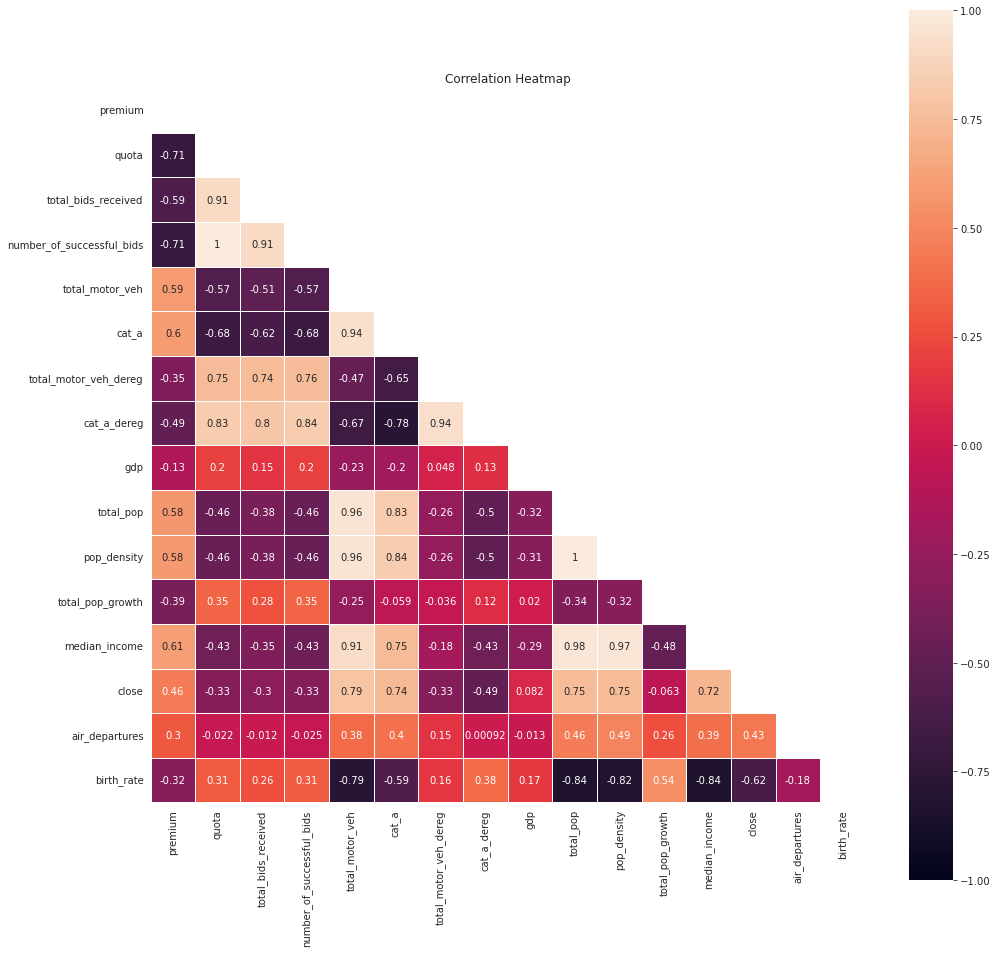

In [95]:
# Creating correlation heatmap for Cat A dataset
plt.figure(figsize=(16,16))

corr = merged_df_cat_a.drop(columns=[
    'date', 'new_date', 'year', 'quarter', 'month', 'day', 'year_lag',
    'quarter_lag', 'month_lag', 'year_lag2', 'quarter_lag2',
    'average_income', 'average_employed_income', 'median_employed_income'
]).corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


with sns.axes_style("white"):
    sns.heatmap(
        corr, mask = mask,
        square = True,
        annot = True,
        vmin = -1,
        vmax = 1,
        linewidths = .5,
    )

plt.title('Correlation Heatmap');

Variables that have showed strong correlations (approximately >0.4):

I grouped them into separate classifications.
1) COE statistics:  
- Quota (-0.71)  
- Total bids received (0.59)  
- Number of successful bids (0.71)

2) Vehicle Population Attributes:  
- Total motor veh population (0.6)  
- cat a veh population (0.6)  
- cat a veh deregistration (0.49)

3) Macro economic variables:  
- Population / population density (0.58)  
- median income (0.61)  
- STI closing price (0.46)  

However, some variables should not be included as number of successful bids is actually largely influenced by the quota variable.

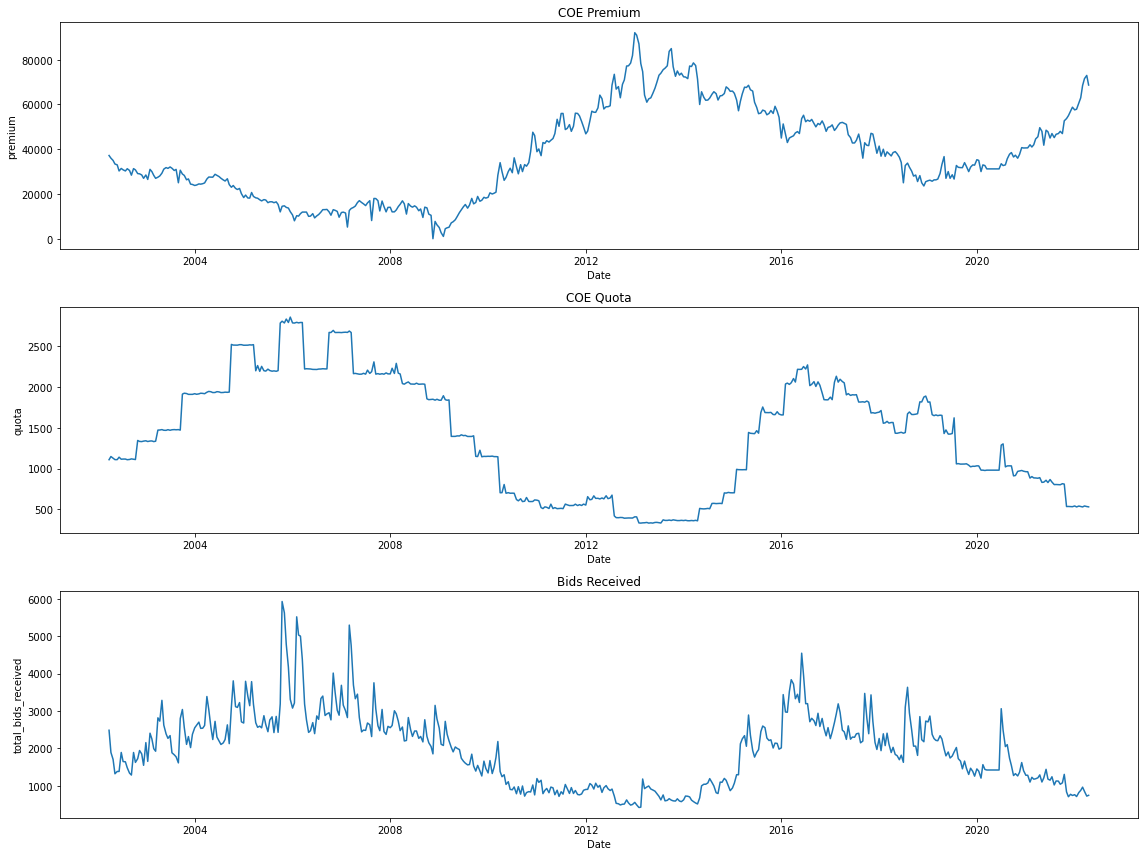

In [96]:
# Plotting for the COE statistics
plt.figure(figsize=(16,12),)

plt.subplot(3,1,1)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='premium',
)
plt.title('COE Premium')
plt.xlabel('Date')


plt.subplot(3,1,2)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='quota',
)
plt.title('COE Quota')
plt.xlabel('Date')

plt.subplot(3,1,3)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='total_bids_received',
)
plt.title('Bids Received')
plt.xlabel('Date')

plt.tight_layout();



As you can see here, COE premiums and quotas are highly negatively correlated.

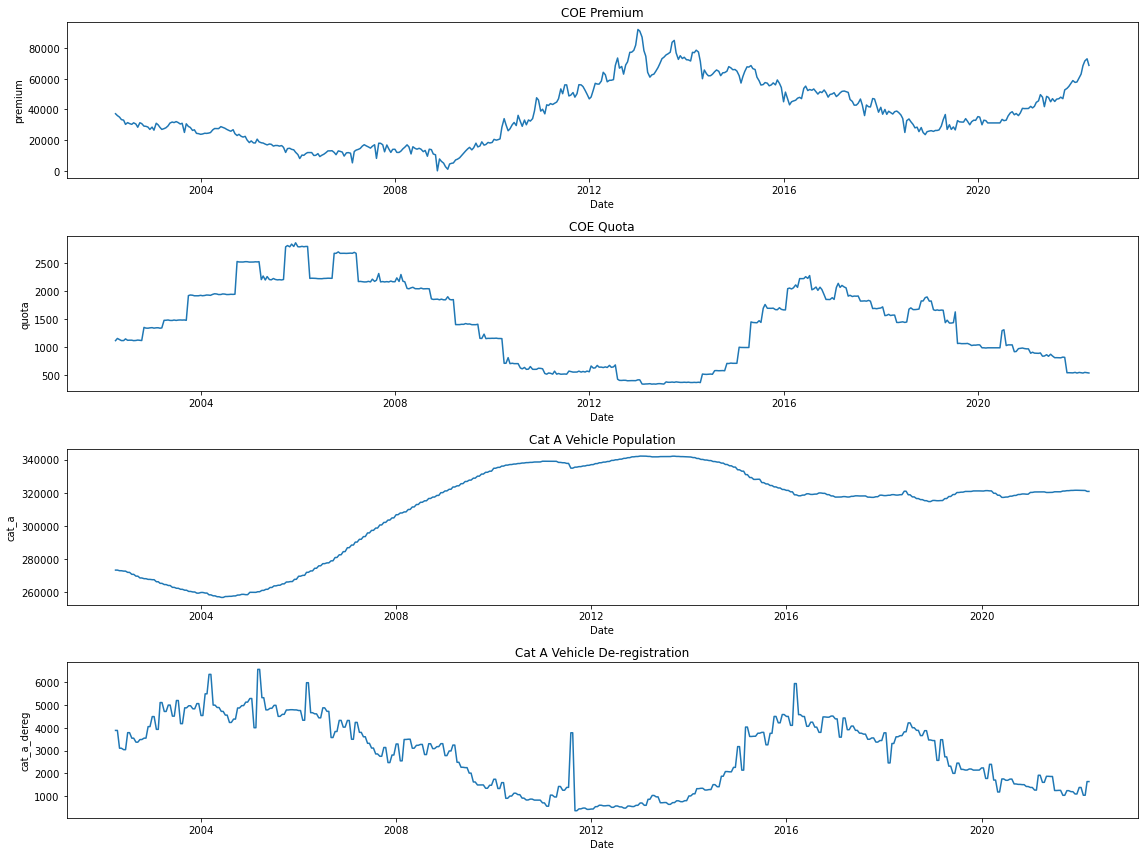

In [97]:
# Plotting for Vehicle Population Attributes
plt.figure(figsize=(16,12),)

plt.subplot(4,1,1)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='premium',
)
plt.title('COE Premium')
plt.xlabel('Date')


plt.subplot(4,1,2)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='quota',
)
plt.title('COE Quota')
plt.xlabel('Date')

plt.subplot(4,1,3)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='cat_a',
)
plt.title('Cat A Vehicle Population')
plt.xlabel('Date')

plt.subplot(4,1,4)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='cat_a_dereg',
)
plt.title('Cat A Vehicle De-registration')
plt.xlabel('Date')

plt.tight_layout();



Cat A vehicle population seems to mirror the COE premiums while Cat A vehicle de-registration mirrors COE quota albeit with a slight lag.

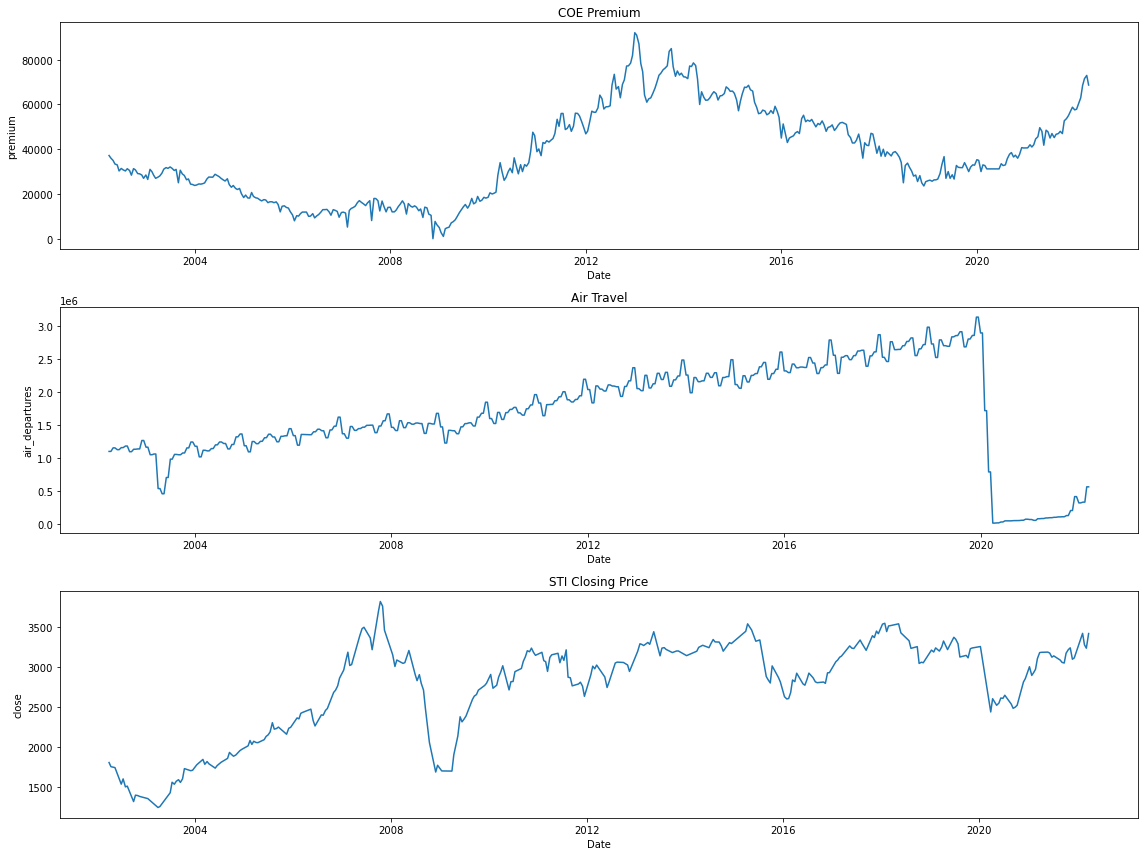

In [98]:
# Plotting with other Macro economic data
plt.figure(figsize=(16,12),)

plt.subplot(3,1,1)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='premium',
)
plt.title('COE Premium')
plt.xlabel('Date')


plt.subplot(3,1,2)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='air_departures',
)
plt.title('Air Travel')
plt.xlabel('Date')

plt.subplot(3,1,3)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='close',
)
plt.title('STI Closing Price')
plt.xlabel('Date')


plt.tight_layout();

Air departures does not follow a close trend with COE premiums at all and should not be used as a feature.  

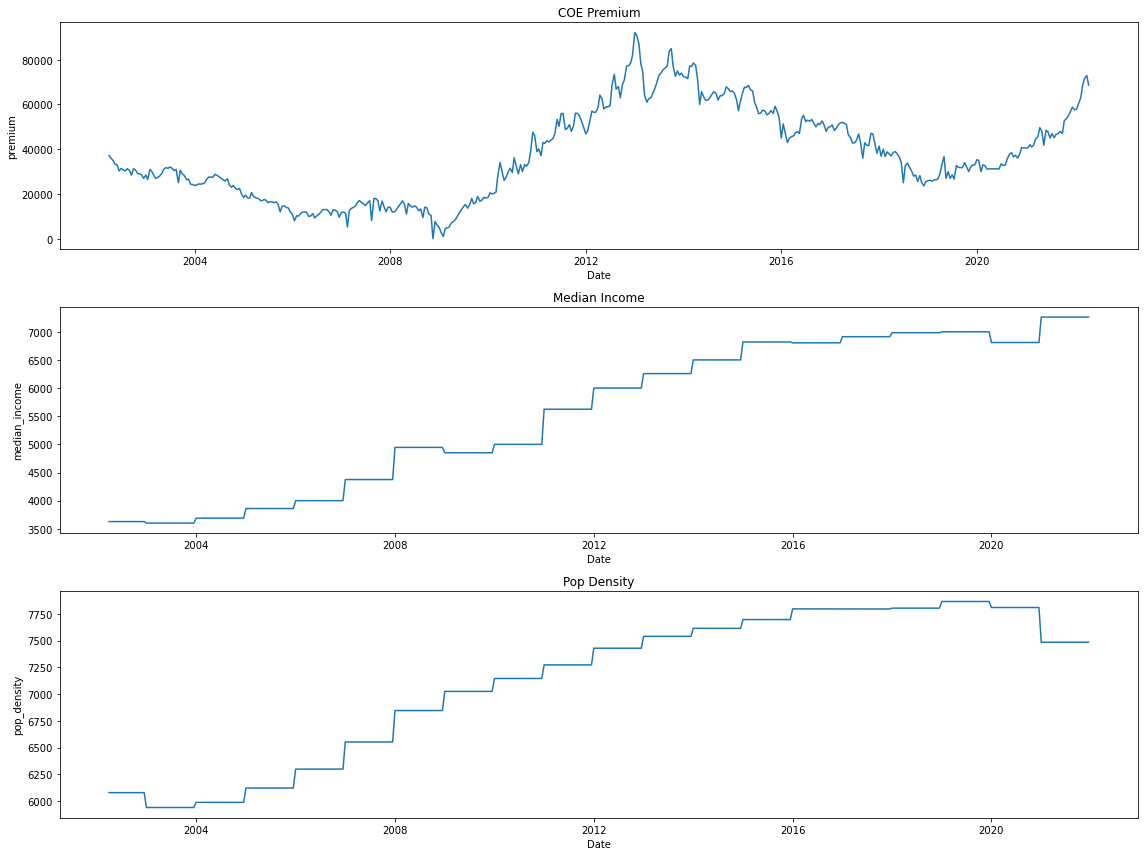

In [99]:
# Plotting with other Macro economic data
plt.figure(figsize=(16,12),)

plt.subplot(3,1,1)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='premium',
)
plt.title('COE Premium')
plt.xlabel('Date')


plt.subplot(3,1,2)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='median_income',
)
plt.title('Median Income')
plt.xlabel('Date')

plt.subplot(3,1,3)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='pop_density',
)
plt.title('Pop Density')
plt.xlabel('Date')

plt.tight_layout();

While the variables here where shown to have a high correlation to COE premiums, they do not closely mimic the shape of COE premiums. The high correlation is likely only due to the general upward trend.

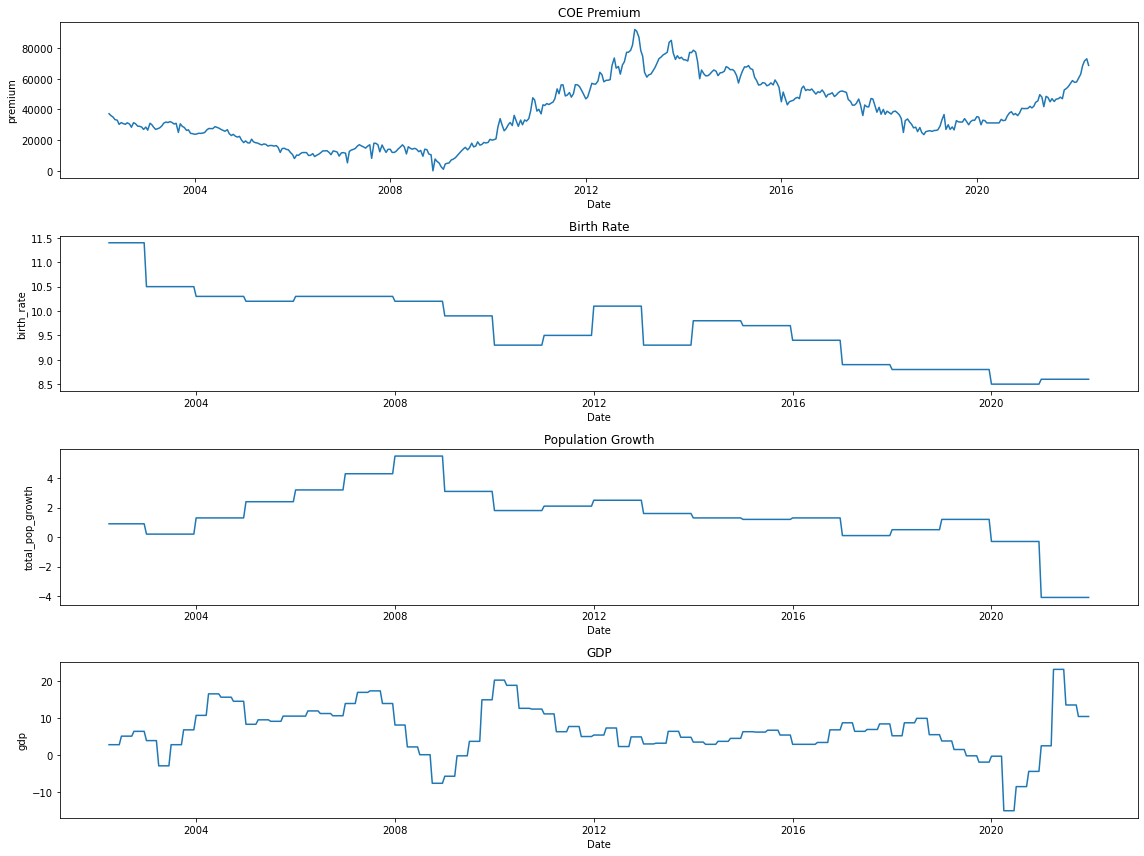

In [100]:
# Plotting with other Macro economic data
plt.figure(figsize=(16,12),)

plt.subplot(4,1,1)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='premium',
)
plt.title('COE Premium')
plt.xlabel('Date')


plt.subplot(4,1,2)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='birth_rate',
)
plt.title('Birth Rate')
plt.xlabel('Date')

plt.subplot(4,1,3)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='total_pop_growth',
)
plt.title('Population Growth')
plt.xlabel('Date')

plt.subplot(4,1,4)
sns.lineplot(
    data=merged_df_cat_a,
    x='new_date',
    y='gdp',
)
plt.title('GDP')
plt.xlabel('Date')

plt.tight_layout();

These 3 dataset does not seem to be useful in predicting the price of COE premiums at all.

After performing EDA on the variables, I noticed that the best predictors for COE premiums still come from the COE dataset itself. Another dataset that could potentially be useful is the vehicle attributes. Macro economic factors are not as likely to be useful in predicting.

## Please proceed to next notebook for modelling.